In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import re
import seaborn as sns
pd.set_option("display.max_columns", 50)

import warnings
warnings.filterwarnings("ignore")

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

## Reading in the dataset

[LINK TO DATASET](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [2]:
# https://www.kaggle.com/datasets/parisrohan/credit-score-classification
train = pd.read_csv(r'.\Data\train.csv')
test = pd.read_csv(r'.\Data\test.csv')

In [3]:
train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

## Data Preparation and Exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

##### Summary stats

In [6]:
train.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [7]:
train.describe(include = "O")

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

The descriptive statistics of the train data was unable to accurately calssify some columns according to their types due to the presence of erroneous values. These columns includes `Age, SSN, Occupation, Changed_credit_limit, Amount_invested_monthly and Monthly_Balance`. This already tells us proper cleaning has to take place. 

Variables such as `Num_Bank_Accounts, Num_Credit_Card, and Interest_Rate` all have extreme values that are almost impossible in the real world. For example a person with `1499.00000` credit cards simply suggests fraud and such applicant should be investigated. 	

Other than that, it is also notable that about `50% (50th percentile)` which is half of the population earn `3093.745000` and below. The `75th percentile` is just at `5957.448333`. In the real world this is relatively a low end income and gives an idea that those with lower earnings take credit more.  

Lets convert some columns to their appropriate dtypes.

In [8]:
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')
train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
train['Num_of_Loan'] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')
train['Num_of_Delayed_Payment'] = pd.to_numeric(train['Num_of_Delayed_Payment'], errors='coerce')
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')

In [9]:
def convert_credit_history_age(age_str):
    '''
    Calculate the actual credit hitory age of inddividuals by extracting the year and month from the string. Use regex to 
    find years and months, extract the desired values (month and year) as integer using int(match.group(1)), Sum the year and month and divide by 12 to get the correct age
    as a single value. 
    '''
    years = 0
    months = 0
    if pd.notnull(age_str):
        years_match = re.search(r'(\d+)\s+Years', age_str)
        months_match = re.search(r'(\d+)\s+Months', age_str)
        if years_match:
            years = int(years_match.group(1))
        if months_match:
            months = int(months_match.group(1))
    return years + (months / 12)
# Apply the function to the Credit_History_Age column
train['Credit_History_Age'] = train['Credit_History_Age'].apply(convert_credit_history_age)

In [51]:
train

id customer_id     month           name    age          ssn  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic            NaN            3359.415833                  4   

       num_credit_card  interest_rate  num_of_loan  \
0                    4              3          4.0   
1                    4              3          4.0   
2                    4              3          4.0   
3                    4              3          4.0   
4                    4              3          4.0   
...                ...            ...          ...   
99995                6              7          2.0   
99996                6              7          2.0   
99997                6           5729          2.0   
99998                6              7          2.0   
99999                6              7          2.0   

                                            type_of_loan  delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
0                         7.0                 11.27                   4.0   
1                         NaN                 11.27                   4.0   
2                         7.0                   NaN                   4.0   
3                         4.0                  6.27                   4.0   
4                         NaN                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                    

In [10]:
train.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  95061.000000   9.302000e+04           84998.000000      100000.000000   
mean     110.934505   1.785790e+05            4194.170850          17.091280   
std      689.407864   1.442878e+06            3183.686167         117.404834   
min     -500.000000   7.005930e+03             303.645417          -1.000000   
25%       24.000000   1.943560e+04            1625.568229           3.000000   
50%       33.000000   3.755074e+04            3093.745000           6.000000   
75%       42.000000   7.284338e+04            5957.448333           7.000000   
max     8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  95215.000000        100000.000000   
mean          22.47443      72.466040      2.780339            21.068780   
std          129.05741     466.422621     62.500940            14.860104   
min            0.00000       1.000000   -100.000000            -5.000000   
25%            4.00000       8.000000      1.000000            10.000000   
50%            5.00000      13.000000      3.000000            18.000000   
75%            7.00000      20.000000      5.000000            28.000000   
max         1499.00000    5797.000000   1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            90254.000000          97909.000000          98035.000000   
mean                31.033051             10.389025             27.754251   
std                226.955758              6.789496            193.177339   
min                 -3.000000             -6.490000              0.000000   
25%                  9.000000              5.320000              3.000000   
50%                 14.000000              9.400000              6.000000   
75%                 18.000000             14.870000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count      98991.000000             100000.000000       100000.000000   
mean        1426.503700                 32.285173           16.768455   
std         1155.045753                  5.116875            9.526725   
min            0.230000                 20.000000            0.000000   
25%          566.080000                 28.052567            9.500000   
50%         1166.370000                 32.305784           17.333333   
75%         1948.200000                 36.496663           24.333333   
max         4998.070000                 50.000000           33.666667   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000             91216.000000     98791.000000  
mean           1403.118217               195.539456       402.551258  
std            8306.041270               199.564527       213.925499  
min               0.000000                 0.000000         0.007760  
25%              30.306660                72.236692       270.106630  
50%              69.249473               128.954538       336.731225  
75%             161.224249               236.815814       470.262938  
max           82331.000000              1977.326102      1602.040519

In [11]:
train.describe(include='O')

ID Customer_ID    Month    Name        SSN Occupation  \
count   100000      100000   100000   90015     100000     100000   
unique  100000       12500        8   10139      12501         16   
top     0x1602   CUS_0xd40  January  Langep  #F%$D@*&8    _______   
freq         1           8    12500      44       5572       7062   

         Type_of_Loan Credit_Mix Payment_of_Min_Amount  \
count           88592     100000                100000   
unique           6260          4                     3   
top     Not Specified   Standard                   Yes   
freq             1408      36479                 52326   

                     Payment_Behaviour Credit_Score  
count                           100000       100000  
unique                               7            3  
top     Low_spent_Small_value_payments     Standard  
freq                             25513        53174

After converting some columns to their numerical variables, some columns can now be explored. 

The values in the age column also suggests the presence of outliers and erroneous values. For example, the average age is approximately `111 years` and the oldest person is `8698` which would mean the data contains history of old and ancient people. And i do not think any business  will be willing to take such high risk😂. Definately, there are wrong values in the field.

The same applies to other variables like `Num_Bank_Accounts, Interest_Rate and Num_of_Loan`. As we go on in this lab, these variables will be cleanedAfter converting some columns to their numerical variables, some columns can now be explored. .

In [12]:
# Converting column names to lower case
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [13]:
var_df = pd.DataFrame(columns = ['Columns','NaN','NaN%','unique','nunique','data_type'])

for i, val in enumerate(train.columns):
    var_df.loc[i] = [val, train[val].isna().sum(), str(round((train[val].isna().sum()/ train.shape[0])*100,2)) + '%', train[val].unique(), train[val].nunique(),train[val].dtype]
var_df

Columns    NaN    NaN%  \
0                         id      0    0.0%   
1                customer_id      0    0.0%   
2                      month      0    0.0%   
3                       name   9985   9.98%   
4                        age   4939   4.94%   
5                        ssn      0    0.0%   
6                 occupation      0    0.0%   
7              annual_income   6980   6.98%   
8      monthly_inhand_salary  15002   15.0%   
9          num_bank_accounts      0    0.0%   
10           num_credit_card      0    0.0%   
11             interest_rate      0    0.0%   
12               num_of_loan   4785   4.78%   
13              type_of_loan  11408  11.41%   
14       delay_from_due_date      0    0.0%   
15    num_of_delayed_payment   9746   9.75%   
16      changed_credit_limit   2091   2.09%   
17      num_credit_inquiries   1965   1.96%   
18                credit_mix      0    0.0%   
19          outstanding_debt   1009   1.01%   
20  credit_utilization_ratio      0    0.0%   
21        credit_history_age      0    0.0%   
22     payment_of_min_amount      0    0.0%   
23       total_emi_per_month      0    0.0%   
24   amount_invested_monthly   8784   8.78%   
25         payment_behaviour      0    0.0%   
26           monthly_balance   1209   1.21%   
27              credit_score      0    0.0%   

                                               unique  nunique data_type  
0   [0x1602, 0x1603, 0x1604, 0x1605, 0x1606, 0x160...   100000    object  
1   [CUS_0xd40, CUS_0x21b1, CUS_0x2dbc, CUS_0xb891...    12500    object  
2   [January, February, March, April, May, June, J...        8    object  
3   [Aaron Maashoh, nan, Rick Rothackerj, Langep, ...    10139    object  
4   [23.0, -500.0, nan, 28.0, 34.0, 54.0, 55.0, 21...     1661   float64  
5   [821-00-0265, #F%$D@*&8, 004-07-5839, 486-85-3...    12501    object  
6   [Scientist, _______, Teacher, Engineer, Entrep...       16    object  
7   [19114.12, 34847.84, nan, 143162.64, 30689.89,...    13437   float64  
8   [1824.8433333333328, nan, 3037.986666666666, 1...    13235   float64  
9   [3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 1414, 1231,...      943     int64  
10  [4, 1385, 5, 1288, 1, 7, 6, 1029, 488, 8, 1381...     1179     int64  
11  [3, 6, 8, 4, 5, 5318, 15, 7, 12, 20, 1, 433, 1...     1750     int64  
12  [4.0, 1.0, 3.0, 967.0, -100.0, 0.0, nan, 2.0, ...      399   float64  
13  [Auto Loan, Credit-Builder Loan, Personal Loan...     6260    object  
14  [3, -1, 5, 6, 8, 7, 13, 10, 0, 4, 9, 1, 12, 11...       73     int64  
15  [7.0, nan, 4.0, 6.0, 1.0, -1.0, 0.0, 8.0, 5.0,...      698   float64  
16  [11.27, nan, 6.27, 9.27, 5.42, 7.42, 6.42, 7.1...     4375   float64  
17  [4.0, 2.0, 3.0, nan, 5.0, 9.0, 8.0, 7.0, 6.0, ...     1223   float64  
18                           [_, Good, Standard, Bad]        4    object  
19  [809.98, 605.03, 1303.01, 632.46, 943.86, 548....    12203   float64  
20  [26.822619623699016, 31.94496005538421, 28.609...   100000   float64  
21  [22.083333333333332, 0.0, 22.25, 22.3333333333...      405   float64  
22                                      [No, NM, Yes]        3    object  
23  [49.57494921489417, 18.816214573128885, 246.99...    14950   float64  
24  [80.41529543900253, 118.28022162236736, 81.699...    91048   float64  
25  [High_spent_Small_value_payments, Low_spent_La...        7    object  
26  [312.49408867943663, 284.62916249607184, 331.2...    98791   float64  
27                             [Good, Standard, Poor]        3    object

Exploring the data we can see that there are missing vlaues in 12 columns. With the highest being `monthly_inhand_salary` which has  `15%` of its values missing. 

The dataset only covers 8 months.

It contains some potentially irrelevant columns such as `id customer_id, ssn and Name` which will eventually be dropped before the model building starts.

## Data Cleaning

In [14]:
# Checking for duplicate values

def remove_duplicate(df, holdout_set = None):
    """
    Detect and remove duplicate rows in the dataset.
    """
    b4 = df.shape[0]
    print(f'{holdout_set} -- Before Removing Duplicate: {b4:,}')
    df.drop_duplicates(keep='first', inplace=True)
    after = df.shape[0]
    print (f'{holdout_set} -- After Removing Duplicate: {after:,}', '\n')

    if b4 == after:
        print(f"There are no duplicate rows in the {holdout_set}", '\n')
    else:
        print(f"{b4 - after:,} duplicate row(s) has been removed")


remove_duplicate(train, 'Data') 

Data -- Before Removing Duplicate: 100,000
Data -- After Removing Duplicate: 100,000 

There are no duplicate rows in the Data 



In [15]:
cols = [ 'month', 'age', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score']

relevant_cols = train[cols] 
relevant_copy = relevant_cols.copy()

In [16]:
print(train.shape)
print(relevant_copy.shape)

(100000, 28)
(100000, 24)


In [17]:
# create helper functions
# These functions were created as the project progressed and were later brought to the top.
def remove_trailing_underscore(col):

    """
    Removes trailing underscores from a specified column in a Pandas DataFrame and converts the cleaned values to numeric.

    Parameters:
    - col (str): The column name for which trailing underscores should be removed.

    Returns:
    - pd.Series: A Pandas Series containing the cleaned and converted numeric values.

    """
    underscore_removed = pd.to_numeric(relevant_copy[col].str.rstrip('_'), errors='coerce')

    return underscore_removed



def categorize_loan_types(type_of_loans_splited):

    """
    Categorizes a list of loan types based on their lengths into 10 different lists.

    Parameters:
    - type_of_loans_splited (list): A list of loan types to be categorized.

    Returns:
    Tuple of 10 lists: (_1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others)
    """

    type_lists = {str(len): [] for len in range(1, 11)}

    for i in type_of_loans_splited:
        length = len(i)
        type_lists[str(length)].append(i)

    _1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others = (
        type_lists[str(len)] for len in range(1, 11)
    )

    return _1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others


def remove_negative_vals(df, col):
    df[col] = abs(df[col])


def convert_to_int(df, cols):
    for col in cols:
        df[col] = df[col].astype('int')


def remove_error_vals(col):

    """
    Removes specified error values from a column in a Pandas DataFrame.

    Parameters:
    - col (str): The column name from which error values should be removed.

    Returns:
    list: A list containing cleaned values with specified error values replaced by NaN.

    """
    error_vals = ['_______','!@9#%8','_','NM']
    cleaned_data = [np.nan if val in error_vals else val for val in relevant_copy[col]]
    return cleaned_data

# def convert_to_numeric(col):
#     cleaned_col = pd.to_numeric(relevant_cols[col], errors='coerce')
#     return cleaned_col



#### Applying functions to relevant columns

In [18]:
# relevant_copy['age'] = remove_trailing_underscore('age')
# relevant_copy['annual_income'] = remove_trailing_underscore('annual_income')
# relevant_copy['num_of_loan'] = remove_trailing_underscore('num_of_loan')
# relevant_copy['num_of_delayed_payment'] = remove_trailing_underscore('num_of_delayed_payment')
# relevant_copy['changed_credit_limit'] = remove_trailing_underscore('changed_credit_limit')
# relevant_copy['outstanding_debt'] = remove_trailing_underscore('outstanding_debt')
# relevant_copy['amount_invested_monthly'] = remove_trailing_underscore('amount_invested_monthly')
# relevant_copy['monthly_balance'] = remove_trailing_underscore('monthly_balance')

#### Splitting into numerical and categorical values

In [19]:
num_col = relevant_copy.select_dtypes(include=np.number).columns
cat_col = relevant_copy.select_dtypes(include="object").columns

target = 'credit_score'
cat_col = cat_col[:-1] # remove the target variable from the categorical list

print('Numerical cols:', '\n')
print(num_col)
print("\n\n")
print('Categorical cols:', '\n')
print(cat_col)
print("\n\n")
print('Target:', '\n')
print(target)

Numerical cols: 

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')



Categorical cols: 

Index(['month', 'occupation', 'type_of_loan', 'credit_mix',
       'payment_of_min_amount', 'payment_behaviour'],
      dtype='object')



Target: 

credit_score


In [20]:
for i in cat_col:
    distinct_vals = relevant_copy[i].nunique()
    print(f'Here are the {distinct_vals} unique values in {i} column:')
    print(relevant_copy[i].unique())
    print("")
    print("__________" * 8)

Here are the 8 unique values in month column:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

________________________________________________________________________________
Here are the 16 unique values in occupation column:
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

________________________________________________________________________________
Here are the 6260 unique values in type_of_loan column:
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']

________________________________________________________________________________
Here are 

The for loop above shows the unique values in the categorical columns. The idea is to have a microscopic view of each categorical column and some erroneous values. And from this, we can see a few errors like `_______`, `_` and `'!@9#%8'`. `NM` in `payment_of_min_amount` seems erronuous as it should be a Yes or No response. Other variables such as the payment_behaviour column also appears to have an erroenous value ('!@9#%8').

These values have to be removed or replaced with null values. To do this, the remove_error_vals function created earlier wil be applied.

In [21]:
# Applying the remove_error_vals function to all categorical columns
for i in cat_col:
    relevant_copy[i] = remove_error_vals(i)

In [22]:
relevant_copy.type_of_loan.iloc[40000]

'Auto Loan, and Personal Loan'

In [23]:
for i in cat_col:
    distinct_vals = relevant_copy[i].nunique()
    print(f'{distinct_vals} unique values in {i} column:')
    print(relevant_copy[i].unique())
    print("")
    print("__________" * 8)


8 unique values in month column:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

________________________________________________________________________________
15 unique values in occupation column:
['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

________________________________________________________________________________
6260 unique values in type_of_loan column:
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']

________________________________________________________________________________
3 unique values in credit_mix column:
[nan 'Good' 'Sta

The erroneous values have all been replaced with nan. Now, this data is ready for further exploration.

### Data Visualization


##### Distribution of the credit scores

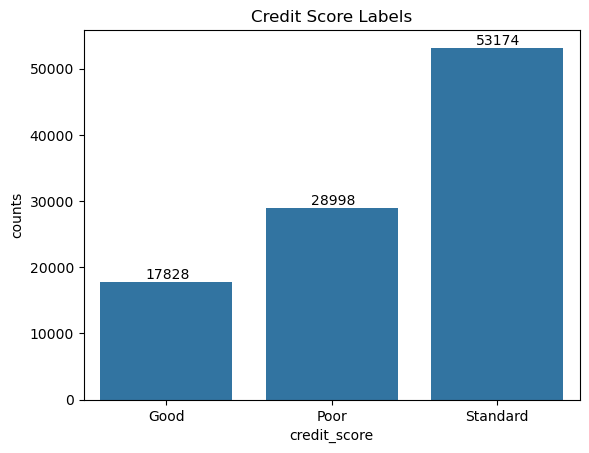

In [24]:
data = relevant_copy.groupby('credit_score').agg(counts=('credit_score','count')).reset_index()
ax = sns.barplot(data = data, x='credit_score',y='counts')

for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = int(p.get_height())
    ax.annotate(text = y, xy = (x,y), ha = 'center', va = 'center', xytext = (1,5), textcoords = 'offset points')

plt.title('Credit Score Labels');

There are 3 credit classes in this dataset `Good,Standard and Poor`. The `Standard` class is the most represented class in the dataset with `53,174`. While `28,998` rows represent the `Poor` class. And `17,828` for the `Good` class. The difference between these classes already shows the dataset is imbalanced. Later on in this lab, this imbalance will be handled using some techniques. 

For now, lets focus on drawing insights from the data.

#### Month and credit score distribution

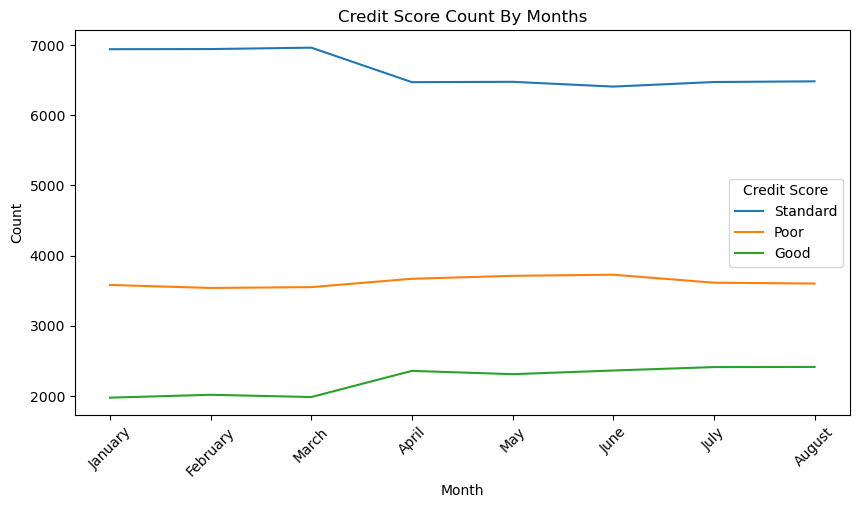

In [25]:
data  = relevant_copy.groupby(['month','credit_score']).agg(count=('credit_score','count')).reset_index()

# Set custom order for month to order it in the right way.
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=custom_order, ordered=True)
df_sorted = data.sort_values("month")

plt.figure(figsize=(10,5))
sns.lineplot(data=df_sorted, x='month',y='count',hue='credit_score')
plt.title("Credit Score Count By Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title='Credit Score')
plt.xticks(rotation=45);

Generally accross all 8 months those with `standard` credit scores have dominated the scene. Across all months they were above `6300` while for `Good and Poor`, they remained below `2500 and 4800` respectively. This further confirms that generally the customers are mostly those with `Standard` credit score.

#### Age vs Payment Behaviour

In [26]:
relevant_copy['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

There seems to be some irregularities between the `age and credit history age` columns. about `44k` rows have their `credit history age` higher than their age. In the real world this is not possible. This could be due to data entry errors. To handle this case, 16 years will be added to all the rows where their `credit history age` is higher than their age. This way we enure that their `age` is atleast 16 years higher than their `credit history age`.

In [27]:
train['credit_history_diff'] = train['age'] - train['credit_history_age']
# sliced = train.query("credit_history_diff<16")
train['new_age'] = train['age'] + 16
train['new_diff'] = train['new_age'] - train['credit_history_age']
train[['age','new_age', 'credit_history_age', 'credit_history_diff', 'new_diff']]
train.query("new_diff<16")


id customer_id     month           name    age          ssn  \
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
32      0x1632  CUS_0x1cdb   January         Deepaa   21.0  615-06-7821   
33      0x1633  CUS_0x1cdb  February         Deepaa   21.0  615-06-7821   
34      0x1634  CUS_0x1cdb     March         Deepaa   21.0  615-06-7821   
35      0x1635  CUS_0x1cdb     April         Deepaa   21.0  615-06-7821   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
2      Scientist       19114.12                    NaN                  3   
32     Developer            NaN            2853.309167                  7   
33     Developer       35547.71                    NaN                  7   
34     Developer       35547.71            2853.309167                  7   
35     Developer       35547.71            2853.309167                  7   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic            NaN            3359.415833                  4   

       num_credit_card  interest_rate  num_of_loan  \
2                    4              3          4.0   
32                   5              5          0.0   
33                   5              5          0.0   
34                   5              5       -100.0   
35                   5              5          0.0   
...                ...            ...          ...   
99995                6              7          2.0   
99996                6              7          2.0   
99997                6           5729          2.0   
99998                6              7          2.0   
99999                6              7          2.0   

                                            type_of_loan  delay_from_due_date  \
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
32                                                   NaN                    5   
33                                                   NaN                    9   
34                                                   NaN                    5   
35                                                   NaN                    1   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
2                         7.0                   NaN                   4.0   
32                        NaN                  2.58                   4.0   
33                        NaN                  2.58                   4.0   
34                       12.0                  2.58                   4.0   
35                       15.0                  2.58                   4.0   
...                       ...                   ...                   ...   
99995                    

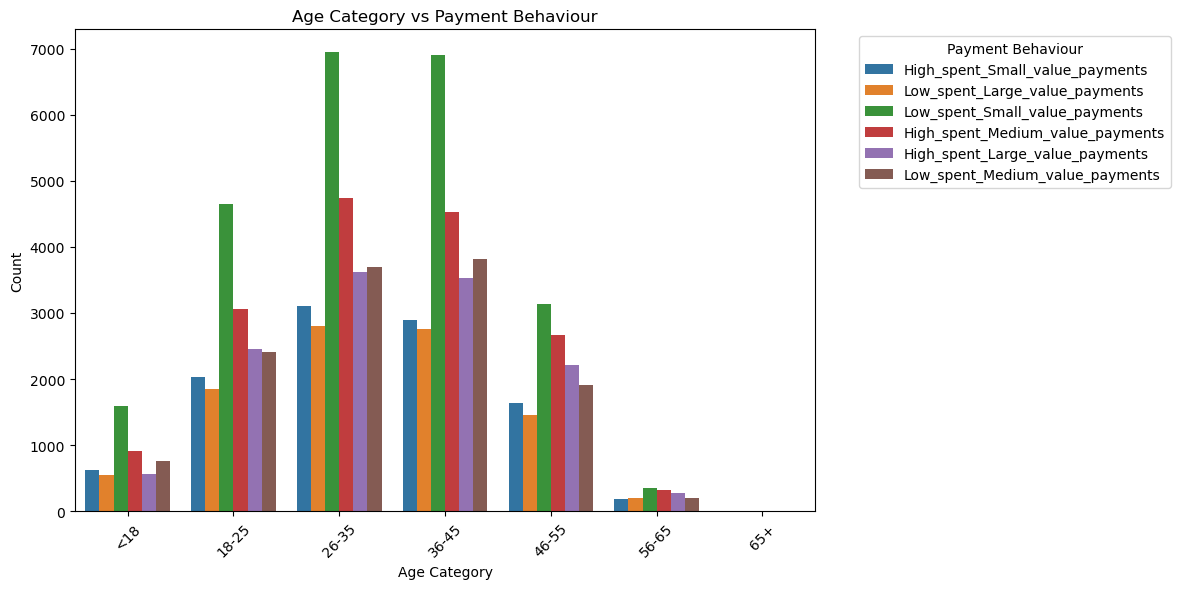

In [28]:

age_bins = [0, 18, 25, 35, 45, 55, 65, 100]  
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
relevant_copy['Age_Category'] = pd.cut(relevant_copy['age'], bins=age_bins, labels=age_labels, right=False)

relevant_copy = relevant_copy.dropna(subset=['Age_Category'])

# Plotting Age Category vs Payment Behaviour using a Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=relevant_copy, x='Age_Category', hue='payment_behaviour')
plt.title('Age Category vs Payment Behaviour')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Behaviour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The lower quartile and upper age quartiles for the different payment behaviors fall within the same range. This suggests that the age category dosent reflect or affect their payment behaviour. 

Understanding the categories of payment behavior is crucial as it provides insights into how individuals manage their finances and repay their debts. Each category of payment behavior represents a distinct pattern of financial behavior, which can be indicative of creditworthiness. Lets understand the different categories

1. **High_spent_Small_value_payments:**
   - This category likely represents individuals who make frequent payments of smaller amounts, indicating regular spending habits on smaller purchases.

2. **Low_spent_Large_value_payments:**
   - Individuals in this category may make fewer payments but of larger amounts, suggesting occasional or bulk purchases or payments.

3. **Low_spent_Medium_value_payments:**
   - Similar to the previous category, but with medium-sized payments. This could indicate moderate spending habits on a variety of goods or services.

4. **Low_spent_Small_value_payments:**
   - This category may represent individuals who make infrequent payments, possibly on smaller expenses, indicating conservative spending behavior.

5. **High_spent_Medium_value_payments:**
   - Individuals in this category make frequent payments, but of medium-sized amounts, suggesting regular spending on moderate expenses.

6. **High_spent_Large_value_payments:**
   - Similar to the previous category, but with larger payments. This could indicate individuals who regularly make significant purch


The **Low_spent_Medium_value_payments** seems to be leading the pack amongst all the age groups. This likely indicates that majority of the customers have moderate spending habits with payments in medium sizes and lesser fequency. Also the  **High_spent_Medium_value_payments** seems to be the second leading category amongst all the age groups. suggesting regular spending on moderate expenses. The lowest category amongst all age groups is the **Low_spent_Large_value_payments**. Individuals in this category may make fewer payments but of larger amounts.fbits and risk profiles.

#### Loan Types

As seen in earlier where we examined the unique values in categorical columns, the **type_of_loan** column had `6260` unique combinations of loan types. This combination would be too many to encode, so we would extract the actual unique loan types from all combinations to visualize these cattegories.

In [29]:
# First we fillna with 'not specified' and remove leading and trailling white spaces
relevant_copy['type_of_loan'] = relevant_copy['type_of_loan'].fillna('not specified')
relevant_copy['type_of_loan_splitted'] = relevant_copy['type_of_loan'].str.lower().str.strip()

# Ensure each row is splitted into a list
loan_types_split = relevant_copy['type_of_loan_splitted'].str.split(',')

# relevant_copy['type_of_loan_splitted'] = relevant_copy['type_of_loan_splitted'].fillna('not specified')
unique_loan_types_with_and = set(loan_type.strip() for sublist in loan_types_split for loan_type in sublist)

print(f"Unique loan types: {unique_loan_types_with_and}")

Unique loan types: {'and home equity loan', 'home equity loan', 'and credit-builder loan', 'payday loan', 'debt consolidation loan', 'personal loan', 'and debt consolidation loan', 'student loan', 'and not specified', 'and auto loan', 'and personal loan', 'and mortgage loan', 'mortgage loan', 'and payday loan', 'not specified', 'and student loan', 'credit-builder loan', 'auto loan'}


In [30]:
# get the actual unique loan types by removing the 'and' prefix.
unique_loan_types = {x.split('and')[1].strip() if x.startswith('and') else x for x in unique_loan_types_with_and}
unique_loan_types

{'auto loan',
 'credit-builder loan',
 'debt consolidation loan',
 'home equity loan',
 'mortgage loan',
 'not specified',
 'payday loan',
 'personal loan',
 'student loan'}

In [31]:
# for loan_type in unique_loan_types:
#     relevant_copy[f'has_{loan_type.replace(" ", "_")}'] = relevant_copy['type_of_loan'].apply(lambda x: int(loan_type in x))

In [32]:
# Count te occurrence of each unique loan type accross all rows. 
loan_type_occurence = {loan_type:0 for loan_type in unique_loan_types_with_and}
for index, row in relevant_copy.iterrows():
    loan_types = row['type_of_loan_splitted']
    for loan_type in unique_loan_types_with_and:
        if loan_type in loan_types:
            loan_type_occurence[loan_type] += 1

In [33]:
# Because of the 'and' at the begining of the last value in each row, we have to sum the value of each key with 'and' as its prefix
# with its original value in loan_type_occurence
loan_type_occurence['auto loan'] = loan_type_occurence['auto loan'] + loan_type_occurence['and auto loan']
loan_type_occurence['personal loan'] = loan_type_occurence['personal loan'] + loan_type_occurence['and personal loan']
loan_type_occurence['home equity loan'] = loan_type_occurence['home equity loan'] + loan_type_occurence['and home equity loan']
loan_type_occurence['debt consolidation loan'] = loan_type_occurence['debt consolidation loan'] + loan_type_occurence['and debt consolidation loan']
loan_type_occurence['student loan'] = loan_type_occurence['student loan'] + loan_type_occurence['and student loan']
loan_type_occurence['payday loan'] = loan_type_occurence['payday loan'] + loan_type_occurence['and payday loan']
loan_type_occurence['not specified'] = loan_type_occurence['not specified'] + loan_type_occurence['and not specified']
loan_type_occurence['mortgage loan'] = loan_type_occurence['mortgage loan'] + loan_type_occurence['and mortgage loan']
loan_type_occurence['credit-builder loan'] = loan_type_occurence['credit-builder loan'] + loan_type_occurence['and credit-builder loan']

In [34]:
# Remove all the loan types that strat with 'and' as they are just duplicates
filtered_loan_type_occurence = {k: v for k, v in loan_type_occurence.items() if not k.startswith('and ')}
filtered_loan_type_occurence

{'home equity loan': 37032,
 'payday loan': 37718,
 'debt consolidation loan': 36667,
 'personal loan': 36815,
 'student loan': 36899,
 'mortgage loan': 36775,
 'not specified': 47665,
 'credit-builder loan': 37133,
 'auto loan': 35791}

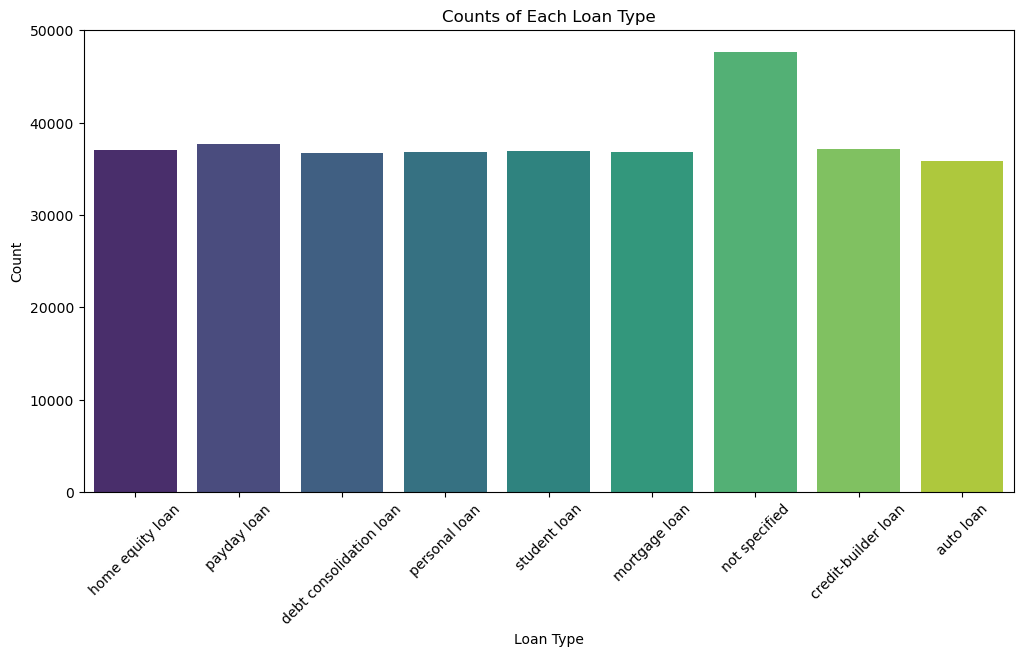

In [35]:
df = pd.DataFrame(list(filtered_loan_type_occurence.items()), columns=['Loan Type', 'Count'])

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Loan Type', y='Count', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Counts of Each Loan Type')
plt.xticks(rotation=45)
plt.show()

All the unique loan types seem to be evenly distributed. It is safe to say borrowers are evenly distributed accross all the loan types available, even when **not specified** has the highest count.

#### Distribution of the numercal variables

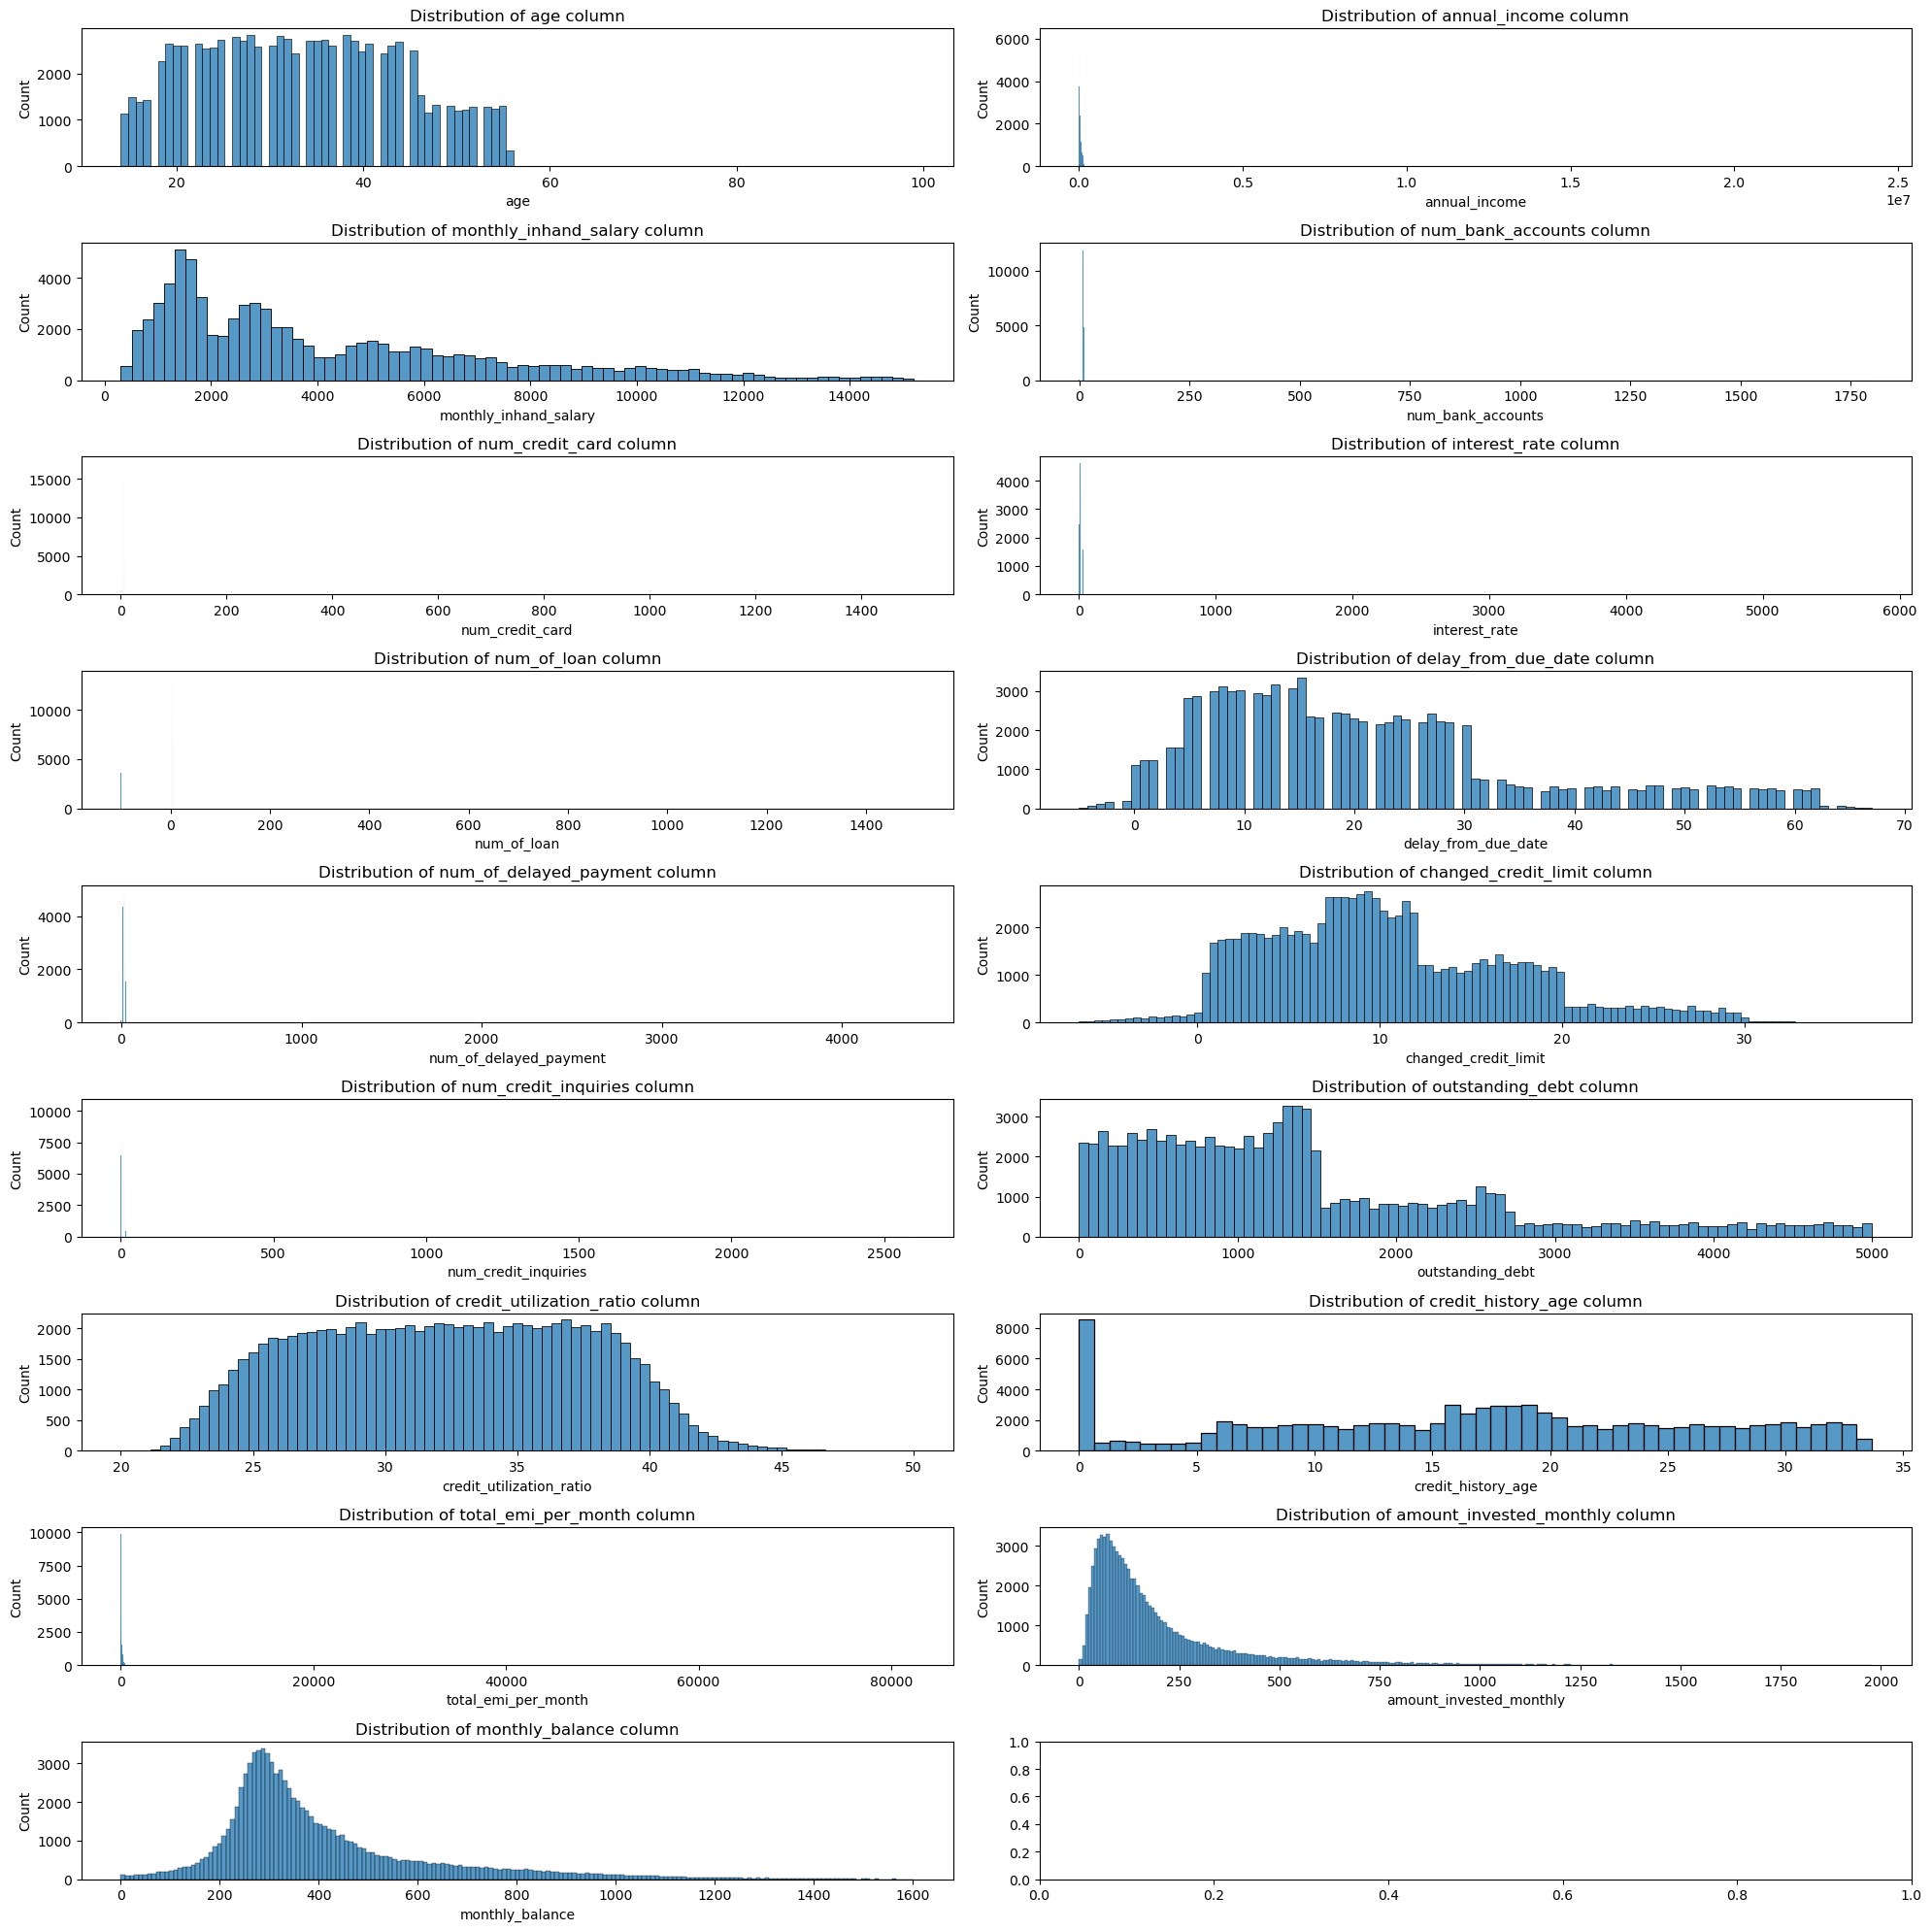

In [36]:
fig, axes = plt.subplots(9, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(x = relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'Distribution of {col} column')

plt.tight_layout()
plt.savefig("Distribution of numerical variables.png")
plt.savefig("Histplot.png")
plt.show()

The shape of histogram of some variables suggest that there might be extreme values. The `monthly_inhand_salary` column has a right skewed shape which tells us that majority have a low inhand salary. Looking at the distribution of `delay_from_due_date` column, we can see that there are customers who have delayed payments with the highest periods being between 9 and 15. The `num_of_delayed_payment` looks too tiny to see but further expansion of the histplot further confirms that many people had delayed payments on multiple occassions. The `credit_utilization_ratio` appears to be the only numerical column with a symmetric distribution.

From the `changed_credit_limit` column, most of the population had their credit limit changed less than 12 times. This could be postive and negative changes but it most likely would be positive due to the fact that majority have standard credit score. While most of the customers appear to have an `outstanding debt`, it is important to note that majority of the outstanding debts are below 1500 while some run up to as high as 5000.

Literally almost everyone of the customers in the population utilize their credit. While it is good that the customers invest, most of the however have a poor investment value of less than `250`. 

Lets try to visualize the outliers using boxplots.

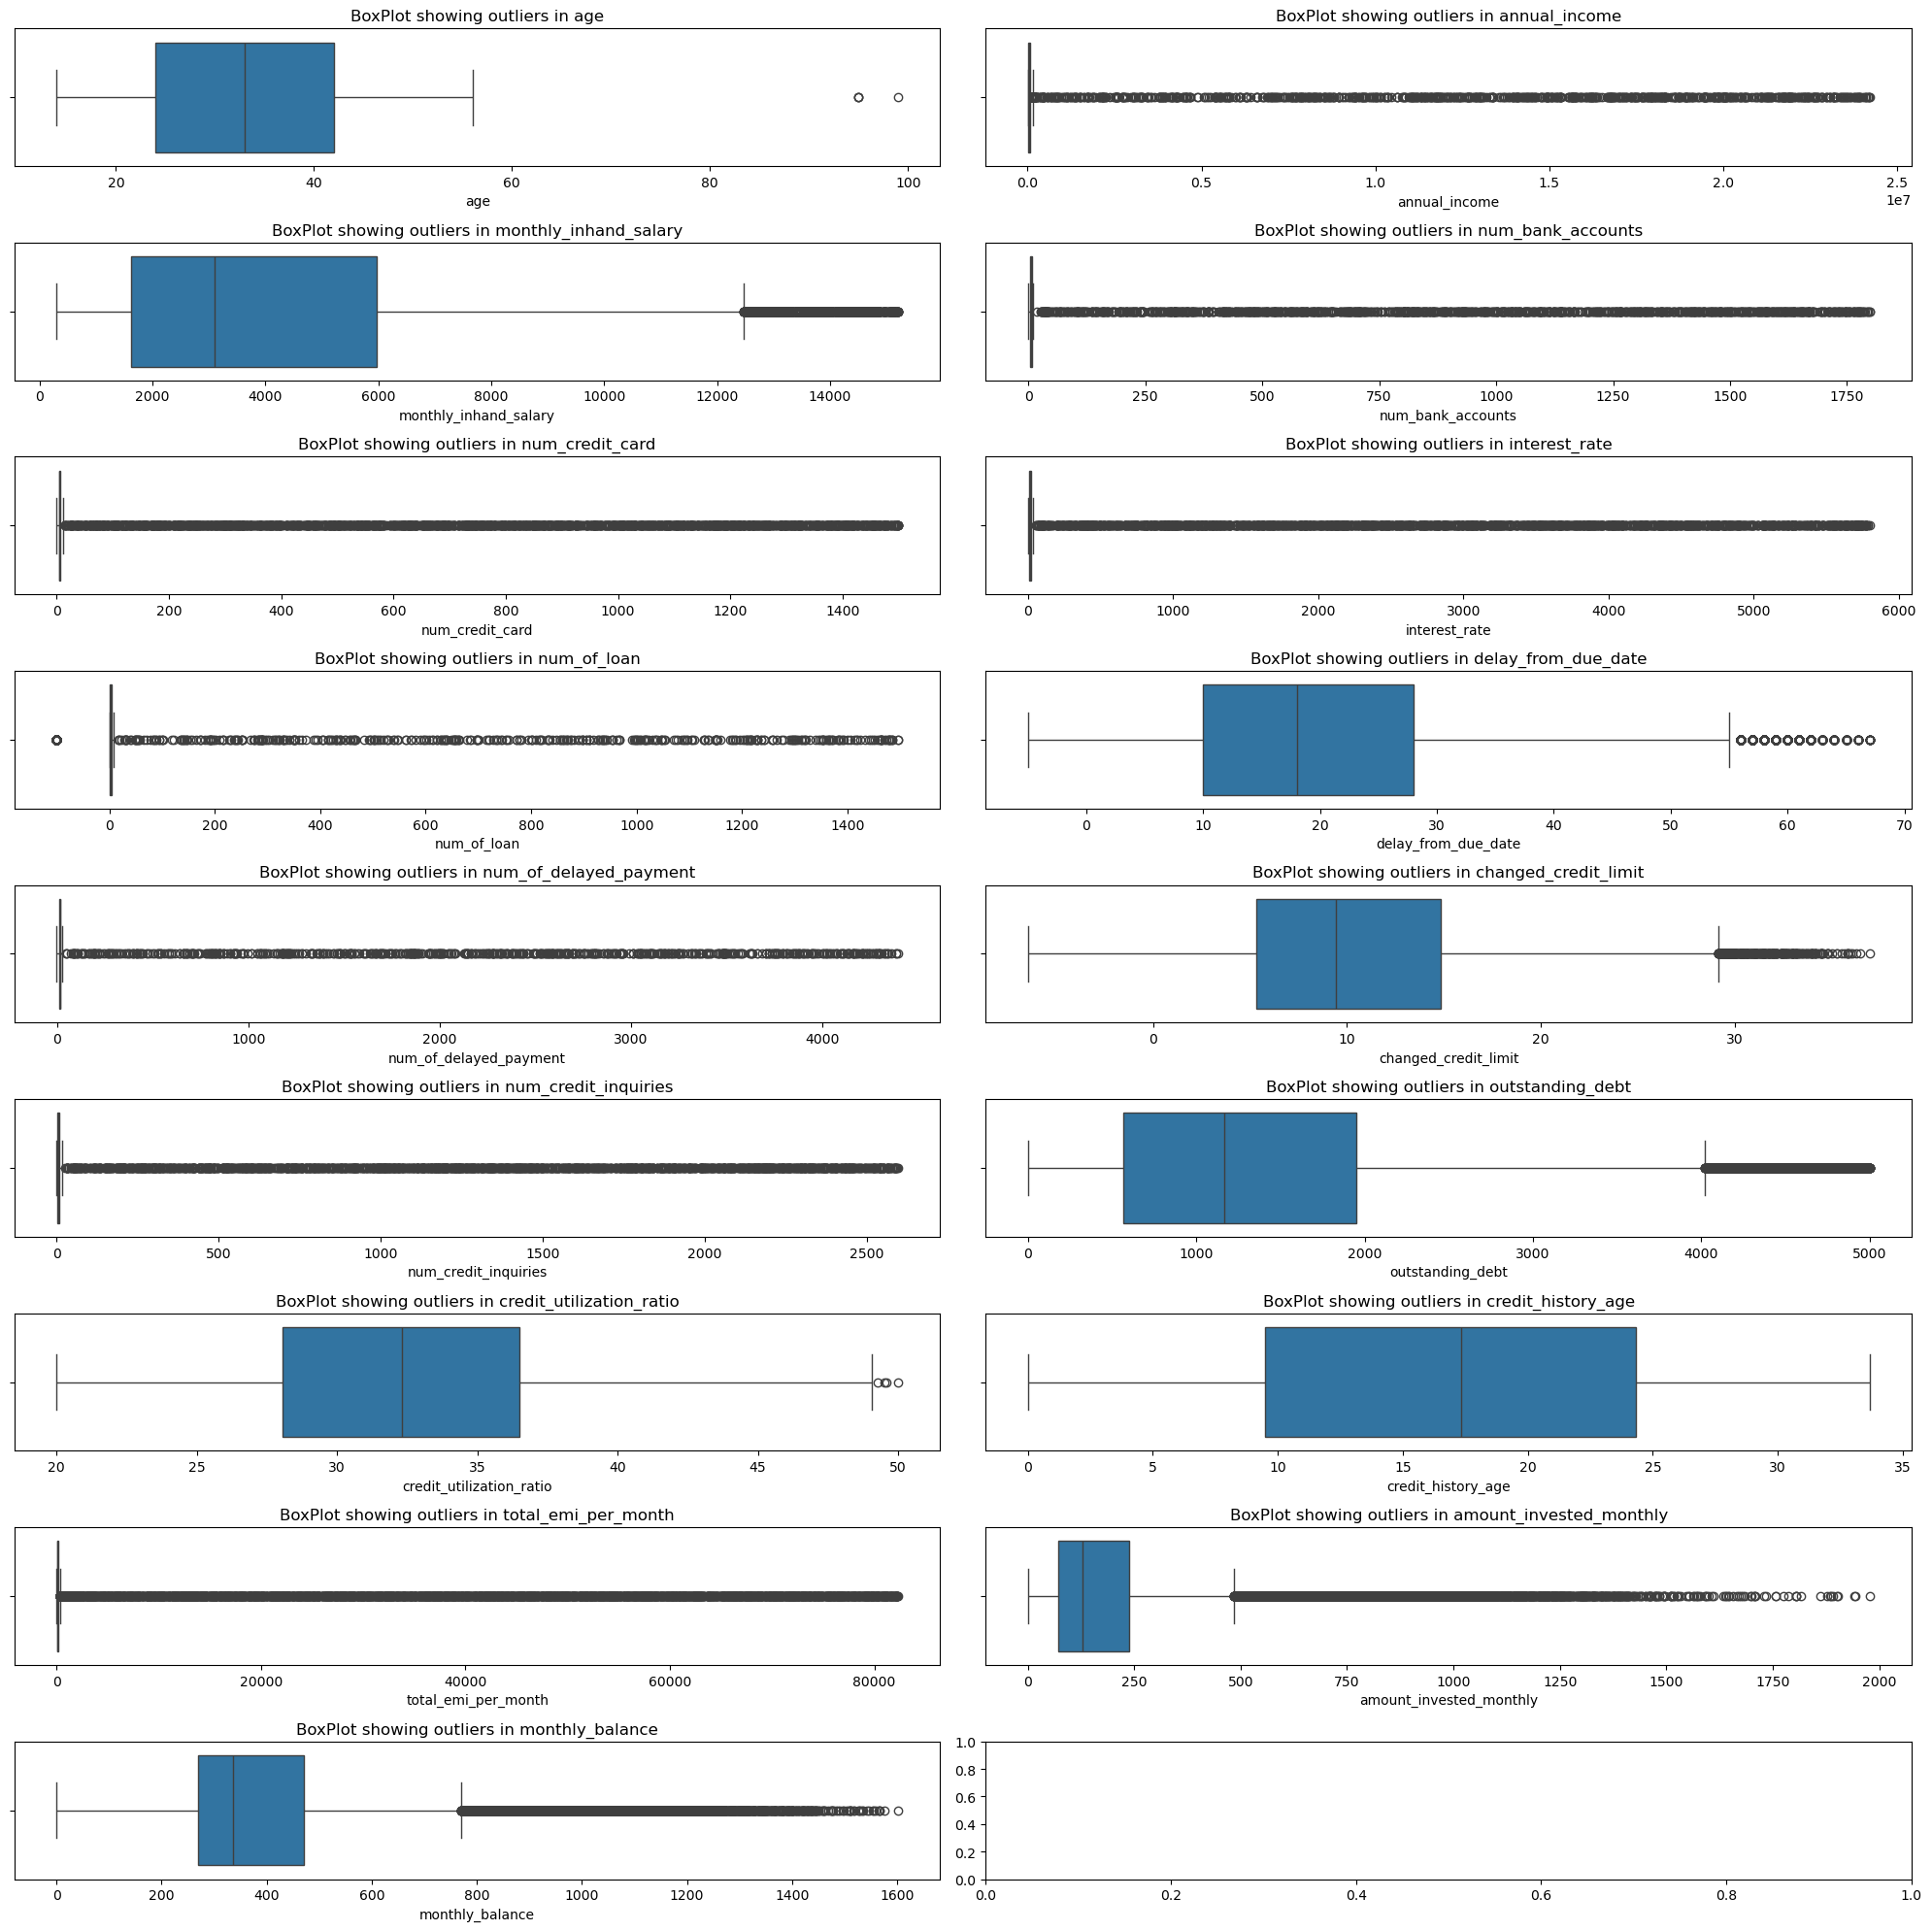

In [37]:
fig, axes = plt.subplots(9, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x = relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'BoxPlot showing outliers in {col}')


plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()

The descriptive statistics and the vardf already gave an idea of what the data missing values are. Now boxplot and hisplot have been used to visualize the numerical columns in the dataset. The boxplot shows that there are outliers in all the numerical columns except `credit_history age`. Some have too many outliers on one side and the histplot further validates the convergence of data on the left side. This is what we call `right skew distribution`. These outliers will be handled using winsorization where values above the 75th percentile will be replaced with the 75th percentile value and values below the 25th will be replaced with the 25th percentile.

### Data Cleaning

In [38]:
# outliers_df = pd.DataFrame()

for feature in num_col:
    # if feature == 'age':
    Q1 = relevant_copy[feature].quantile(0.25)
    Q3 = relevant_copy[feature].quantile(0.75)
    # print('Q1:',Q1, 'Q3:', Q3)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper/lower bound
    relevant_copy[feature] = relevant_copy[feature].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

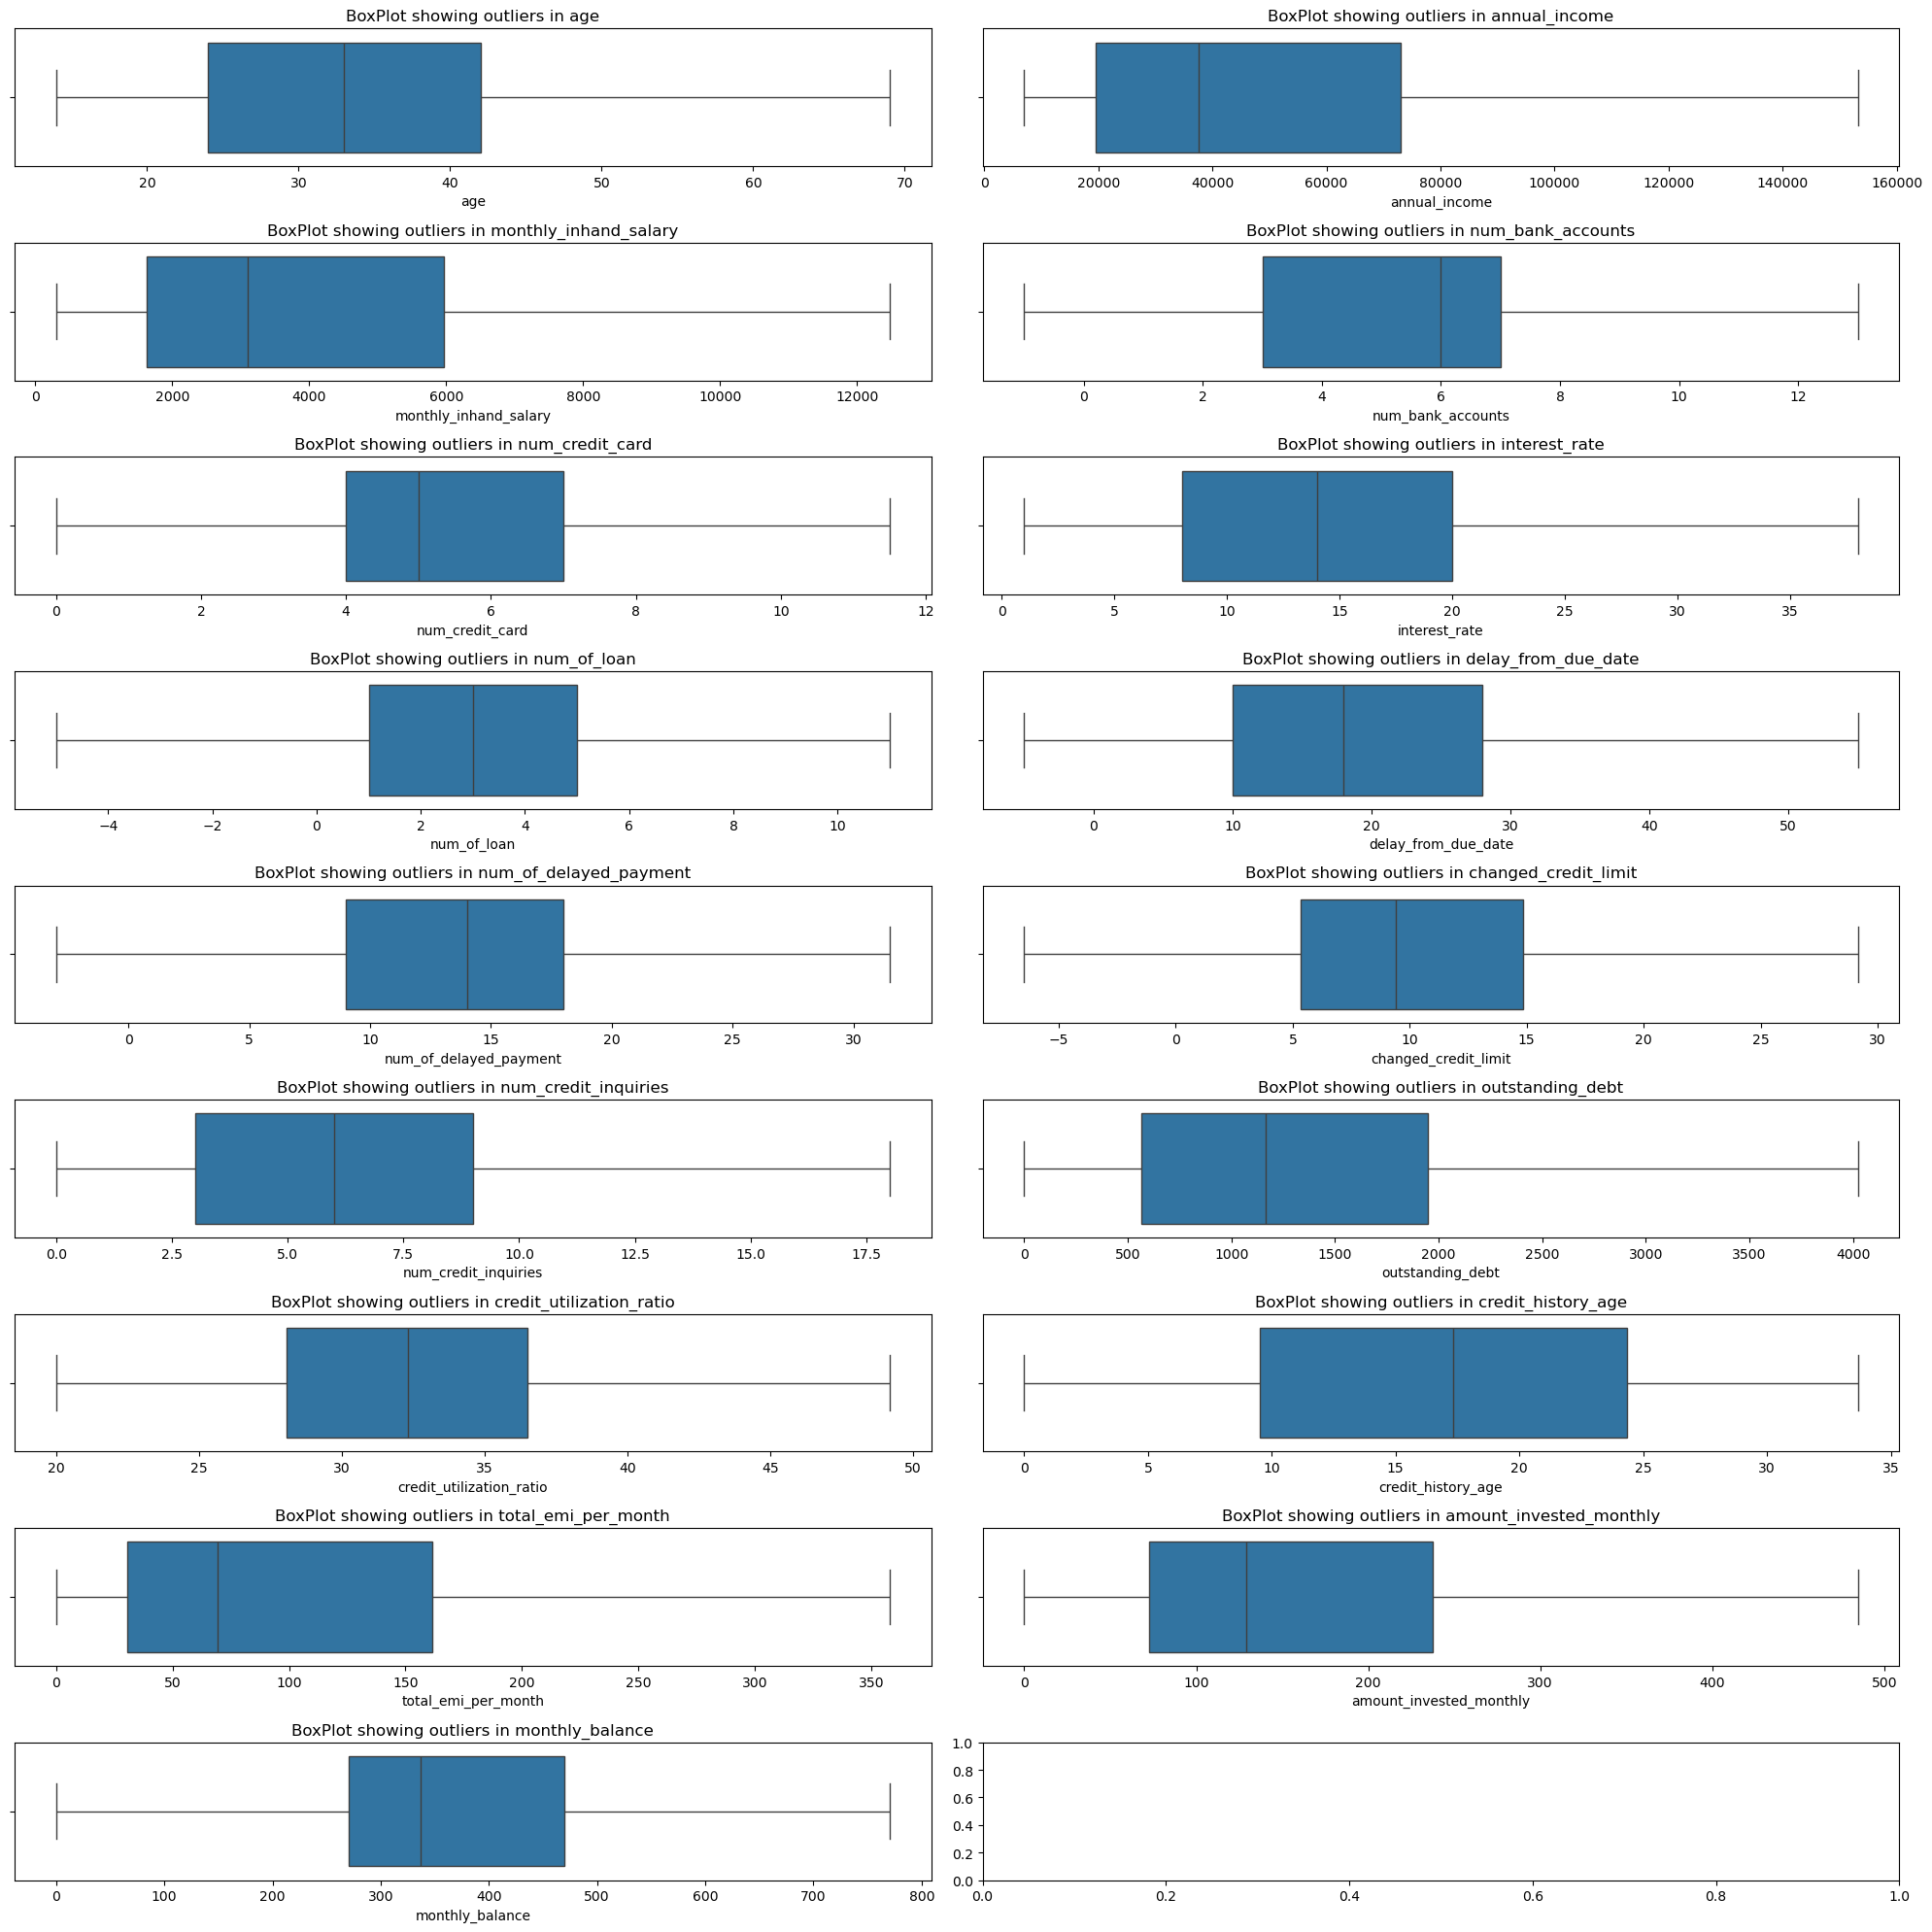

In [39]:
fig, axes = plt.subplots(9, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x = relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'BoxPlot showing outliers in {col}')

plt.tight_layout()
plt.show()

#### Handling Missing Vlaues

In the cells above, it was observed that outliers were present in this dataset. And to handle them, they were replaced with the upper and lower bounds. Outliers wether handled or not will affect the mean of the numerical values, it would be best to replace the missing values with the `median`. While missing values in the categorical values will be replaced the `mode`.    

In [40]:
# Numerical cols
for i, val in enumerate(num_col):
    median_val = relevant_copy[val].median()
    relevant_copy[val].fillna(median_val,inplace=True)


# Categorical cols
for val in cat_col:
    mode_val = relevant_copy[val].mode()
    
    # Check if mode_val is not empty and not NaN
    if not mode_val.empty and not pd.isna(mode_val.iloc[0]):
        relevant_copy[val].fillna(mode_val.iloc[0], inplace=True)
    else:
        # If mode is NaN or empty, fill with a default value
        relevant_copy[val].fillna('Missing_value', inplace=True)


# relevant_copy.info()

Further exploration of the dataset revealed that some columns still have some values that needs some touch. Looking at the `age` column, there are values which are still in negative while some are below 18. Since this dataset is about predicting credit scores, it makes no sense to have people who are less than 18 in this data. Comparing their age to their `credit_history_age` confirms that these values are erroneuos.

Also, there are some negative values in some numerical columns like `num_bank_accounts, interest_rate, num_of_loan, delay_from_due_date, num_of_delayed_payment`, changed_credit_limit. These negative values are likely due to errors. To handle them, it would be assumed that the negative is just an error because these variables can never be negative. For example, a person can never have -5 number of loans. These values will be replaced with their absolute values. 

In [41]:
# affected_cols = 'age', 'num_bank_accounts', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment'
affected_cols =  'num_bank_accounts', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment'
for col in affected_cols:
    remove_negative_vals(relevant_copy,col)

In [42]:
# relevant_copy['auto loan'] = 0
# for index, row in relevant_copy.iterrows():
#     if row['loan_types_list'].isin(['auto loan','and auto loan']):
#         row.at['auto loan', index] = 1



In [43]:
def loan_type_binary(loan_type,loan_list):
    '''
    Check if a given loan_type exists in the given loan_list.
    Return 1 if True and 0 if False
    '''
    loan_list = [x.strip() for x in loan_list] # Remove all the leading and trailing white spaces
    return int(any(item in loan_type for item in loan_list))


In [44]:
relevant_copy['loan_types_list'] = loan_types_split


# Create binary columns for each unique loan type
relevant_copy['auto loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['auto loan', 'and auto loan'], x))

relevant_copy['credit-builder loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['credit-builder loan', 'and credit-builder loan'], x))

relevant_copy['debt consolidation loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['debt consolidation loan', 'and debt consolidation loan'], x))

relevant_copy['home equity loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['home equity loan', 'and home equity loan'], x))

relevant_copy['mortgage loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['mortgage loan', 'and mortgage loan'], x))

relevant_copy['payday loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['payday loan', 'and payday loan'], x))

relevant_copy['personal loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['personal loan', 'and personal loan'], x))

relevant_copy['student loan'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['student loan', 'and student loan'], x))

relevant_copy['not specified'] = relevant_copy['loan_types_list'].apply(
                                            lambda x: loan_type_binary(['not specified', 'and not specified'], x))

relevant_copy.drop(['type_of_loan','type_of_loan_splitted','loan_types_list'],axis = 1, inplace = True)

#### Relationships between variables

In [45]:
relevant_copy['credit_score'] = relevant_copy['credit_score'].astype('category')

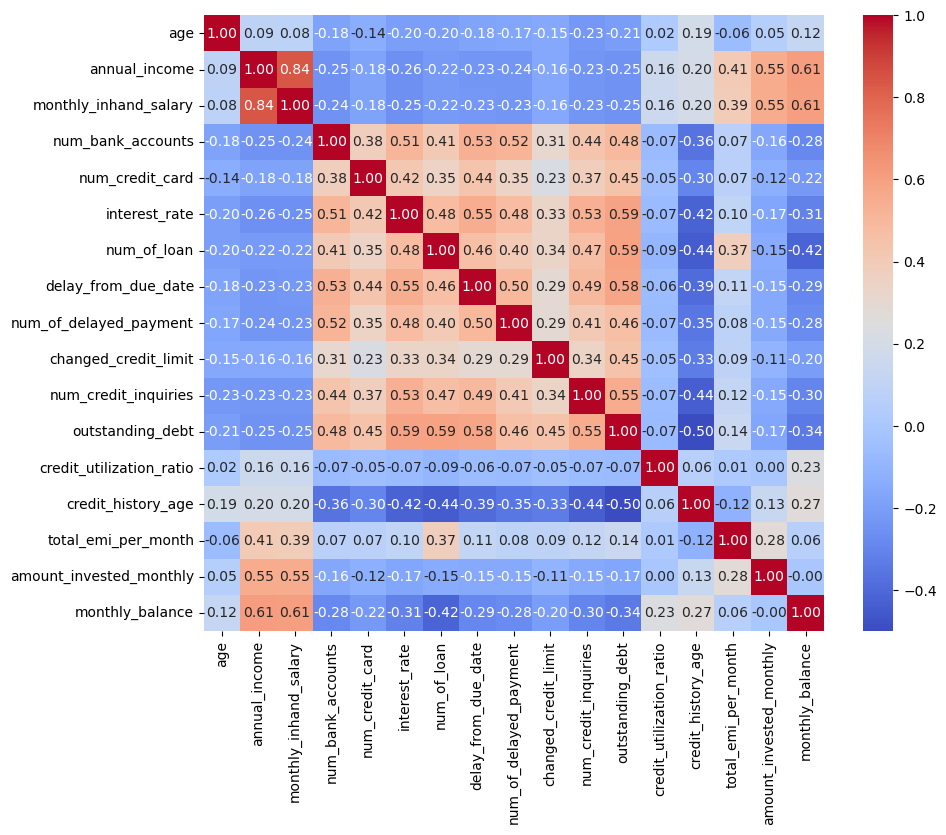

In [46]:
# Correlation between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(relevant_copy[num_col].corr(),annot=True, cmap='coolwarm', fmt=".2f");

In [47]:
correlation_matrix = relevant_copy[num_col].corr()
correlation_matrix

age  annual_income  monthly_inhand_salary  \
age                       1.000000       0.086505               0.083234   
annual_income             0.086505       1.000000               0.836986   
monthly_inhand_salary     0.083234       0.836986               1.000000   
num_bank_accounts        -0.179019      -0.247019              -0.242682   
num_credit_card          -0.135434      -0.181514              -0.179848   
interest_rate            -0.201126      -0.256040              -0.254460   
num_of_loan              -0.197567      -0.217159              -0.215060   
delay_from_due_date      -0.175639      -0.232859              -0.228832   
num_of_delayed_payment   -0.166174      -0.235960              -0.231764   
changed_credit_limit     -0.154978      -0.157237              -0.157219   
num_credit_inquiries     -0.227871      -0.234304              -0.230690   
outstanding_debt         -0.206827      -0.251449              -0.251540   
credit_utilization_ratio  0.024686       0.159452               0.155749   
credit_history_age        0.187311       0.201469               0.201518   
total_emi_per_month      -0.062446       0.405587               0.393927   
amount_invested_monthly   0.054399       0.549861               0.550901   
monthly_balance           0.121675       0.610629               0.605465   

                          num_bank_accounts  num_credit_card  interest_rate  \
age                               -0.179019        -0.135434      -0.201126   
annual_income                     -0.247019        -0.181514      -0.256040   
monthly_inhand_salary             -0.242682        -0.179848      -0.254460   
num_bank_accounts                  1.000000         0.377793       0.509197   
num_credit_card                    0.377793         1.000000       0.415953   
interest_rate                      0.509197         0.415953       1.000000   
num_of_loan                        0.411108         0.348916       0.478888   
delay_from_due_date                0.532694         0.437643       0.546980   
num_of_delayed_payment             0.518350         0.349476       0.482136   
changed_credit_limit               0.308851         0.225130       0.333762   
num_credit_inquiries               0.442455         0.374467       0.531326   
outstanding_debt                   0.484506         0.448867       0.589768   
credit_utilization_ratio          -0.067626        -0.049668      -0.071023   
credit_history_age                -0.359960        -0.296571      -0.423856   
total_emi_per_month                0.073223         0.072741       0.102298   
amount_invested_monthly           -0.160463        -0.121956      -0.170204   
monthly_balance                   -0.283931        -0.221617      -0.312479   

                          num_of_loan  delay_from_due_date  \
age                         -0.197567            -0.175639   
annual_income               -0.217159            -0.232859   
monthly_inhand_salary       -0.215060            -0.228832   
num_bank_accounts            0.411108             0.532694   
num_credit_card              0.348916             0.437643   
interest_rate                0.478888             0.546980   
num_of_loan                  1.000000             0.464799   
delay_from_due_date          0.464799             1.000000   
num_of_delayed_payment       0.402897             0.498118   
changed_credit_limit         0.336027             0.292755   
num_credit_inquiries         0.472311             0.492275   
outstanding_debt             0.591057             0.579697   
credit_utilization_ratio    -0.093478            -0.064619   
credit_history_age          -0.443758            -0.392658   
total_emi_per_month          0.374124             0.110775   
amount_invested_monthly     -0.148371            -0.154166   
monthly_balance             -0.416269            -0.289279   

                          num_of_delayed_payment  changed_credit_limit  \
age                                    -0.166174

- From the correlation matrix, `annual_income` and `monthly_inhand_salary` have the highest correlation (`0.84`). This indicates that as one increases, the other follows with an increase. When a person's annual income increases, his monthly in hand salary increases.

- `Age` having a weak positive correlation with `annual_income` and `monthly_inhand_salary` suggests that older people have a slightly higher chance of a higher income. This could be due to factors like years of experience.

- `Age` also has a weak negative correlation with `num_bank_accounts, num_credit_card, interest_rate, num_of_loan, delay_from_due_date, num_of_delayed_payment, num_credit_inquiries, outstanding_debt and total_emi_per_month`. Older people attract lower interest rates and operate fewer bank accounts.

-  `annual_income` has a strong positive correlation with `monthly_inhand_salary`, moderate positive correlation with `monthly_inhand_salary, amount_invested_monthly and total_emi_per_month`. A higher annual income leads to higher monthly inhand salary and would also result in an increased monthly investement as there is more money.

- `monthly_inhand_salary` follows the same pattern with `annual_income`. Higher income reduces interest and delays.

- `num_credit_card, interest_rate, num_of_loan, delay_from_due_date, num_of_delayed_payment, num_credit_inquiries and outstanding_debt` follow the same pattern and have similar relationships. More bank accounts is associated with more loans, interests, outstanding debts and delays and same for others in this category.

- `credit_utilization_ratio` has almost nothing to do with bank, repayments and debts. It however leads to a very little increase in individual monthly and weekly income.

- `credit_history_age` has a weak to moderately negative relationship with bank products i.e lesser bank accounts, interest rates and delays. It also has a weak positive relaionship with `age, annual_income, monthly_inhand_salary, amount_invested_monthly, and monthly_balance` which implies that older people utilize credits slightly more, averagely have a higer income and invest more than younger people.

- `Total EMI per Month` has a weeak to moderate relaionship with `annual_income, monthly_inhand_salary, amount_invested_monthly, and monthly_balance`, indicating that borrowers with higher income make higher repayments. It also has a weak positive relaionship with bank products, delays and interest. This indicates that individuals with higher monthly repayments tend to have slightly more bank accounts, credit cards, higher interest rates, more delays from due dates, and more delayed payments, although these relationships are weak.

- `Amount Invested Monthly` slightly increases with age. It increases moderately with higher income and slowly with credit history age and repayments. It does not result in an increase in the of bank accounts, credit cards, interest rates, delays and monthly balance.

- `Monthly Balance` slightly increases with age, higher repayments, older credit history and credit utilizaion history. But it increases at a much higher rate with an increase in Income. Monthly balance is associated with fewer financial products, lower interest rates, fewer loans, and fewer delays.



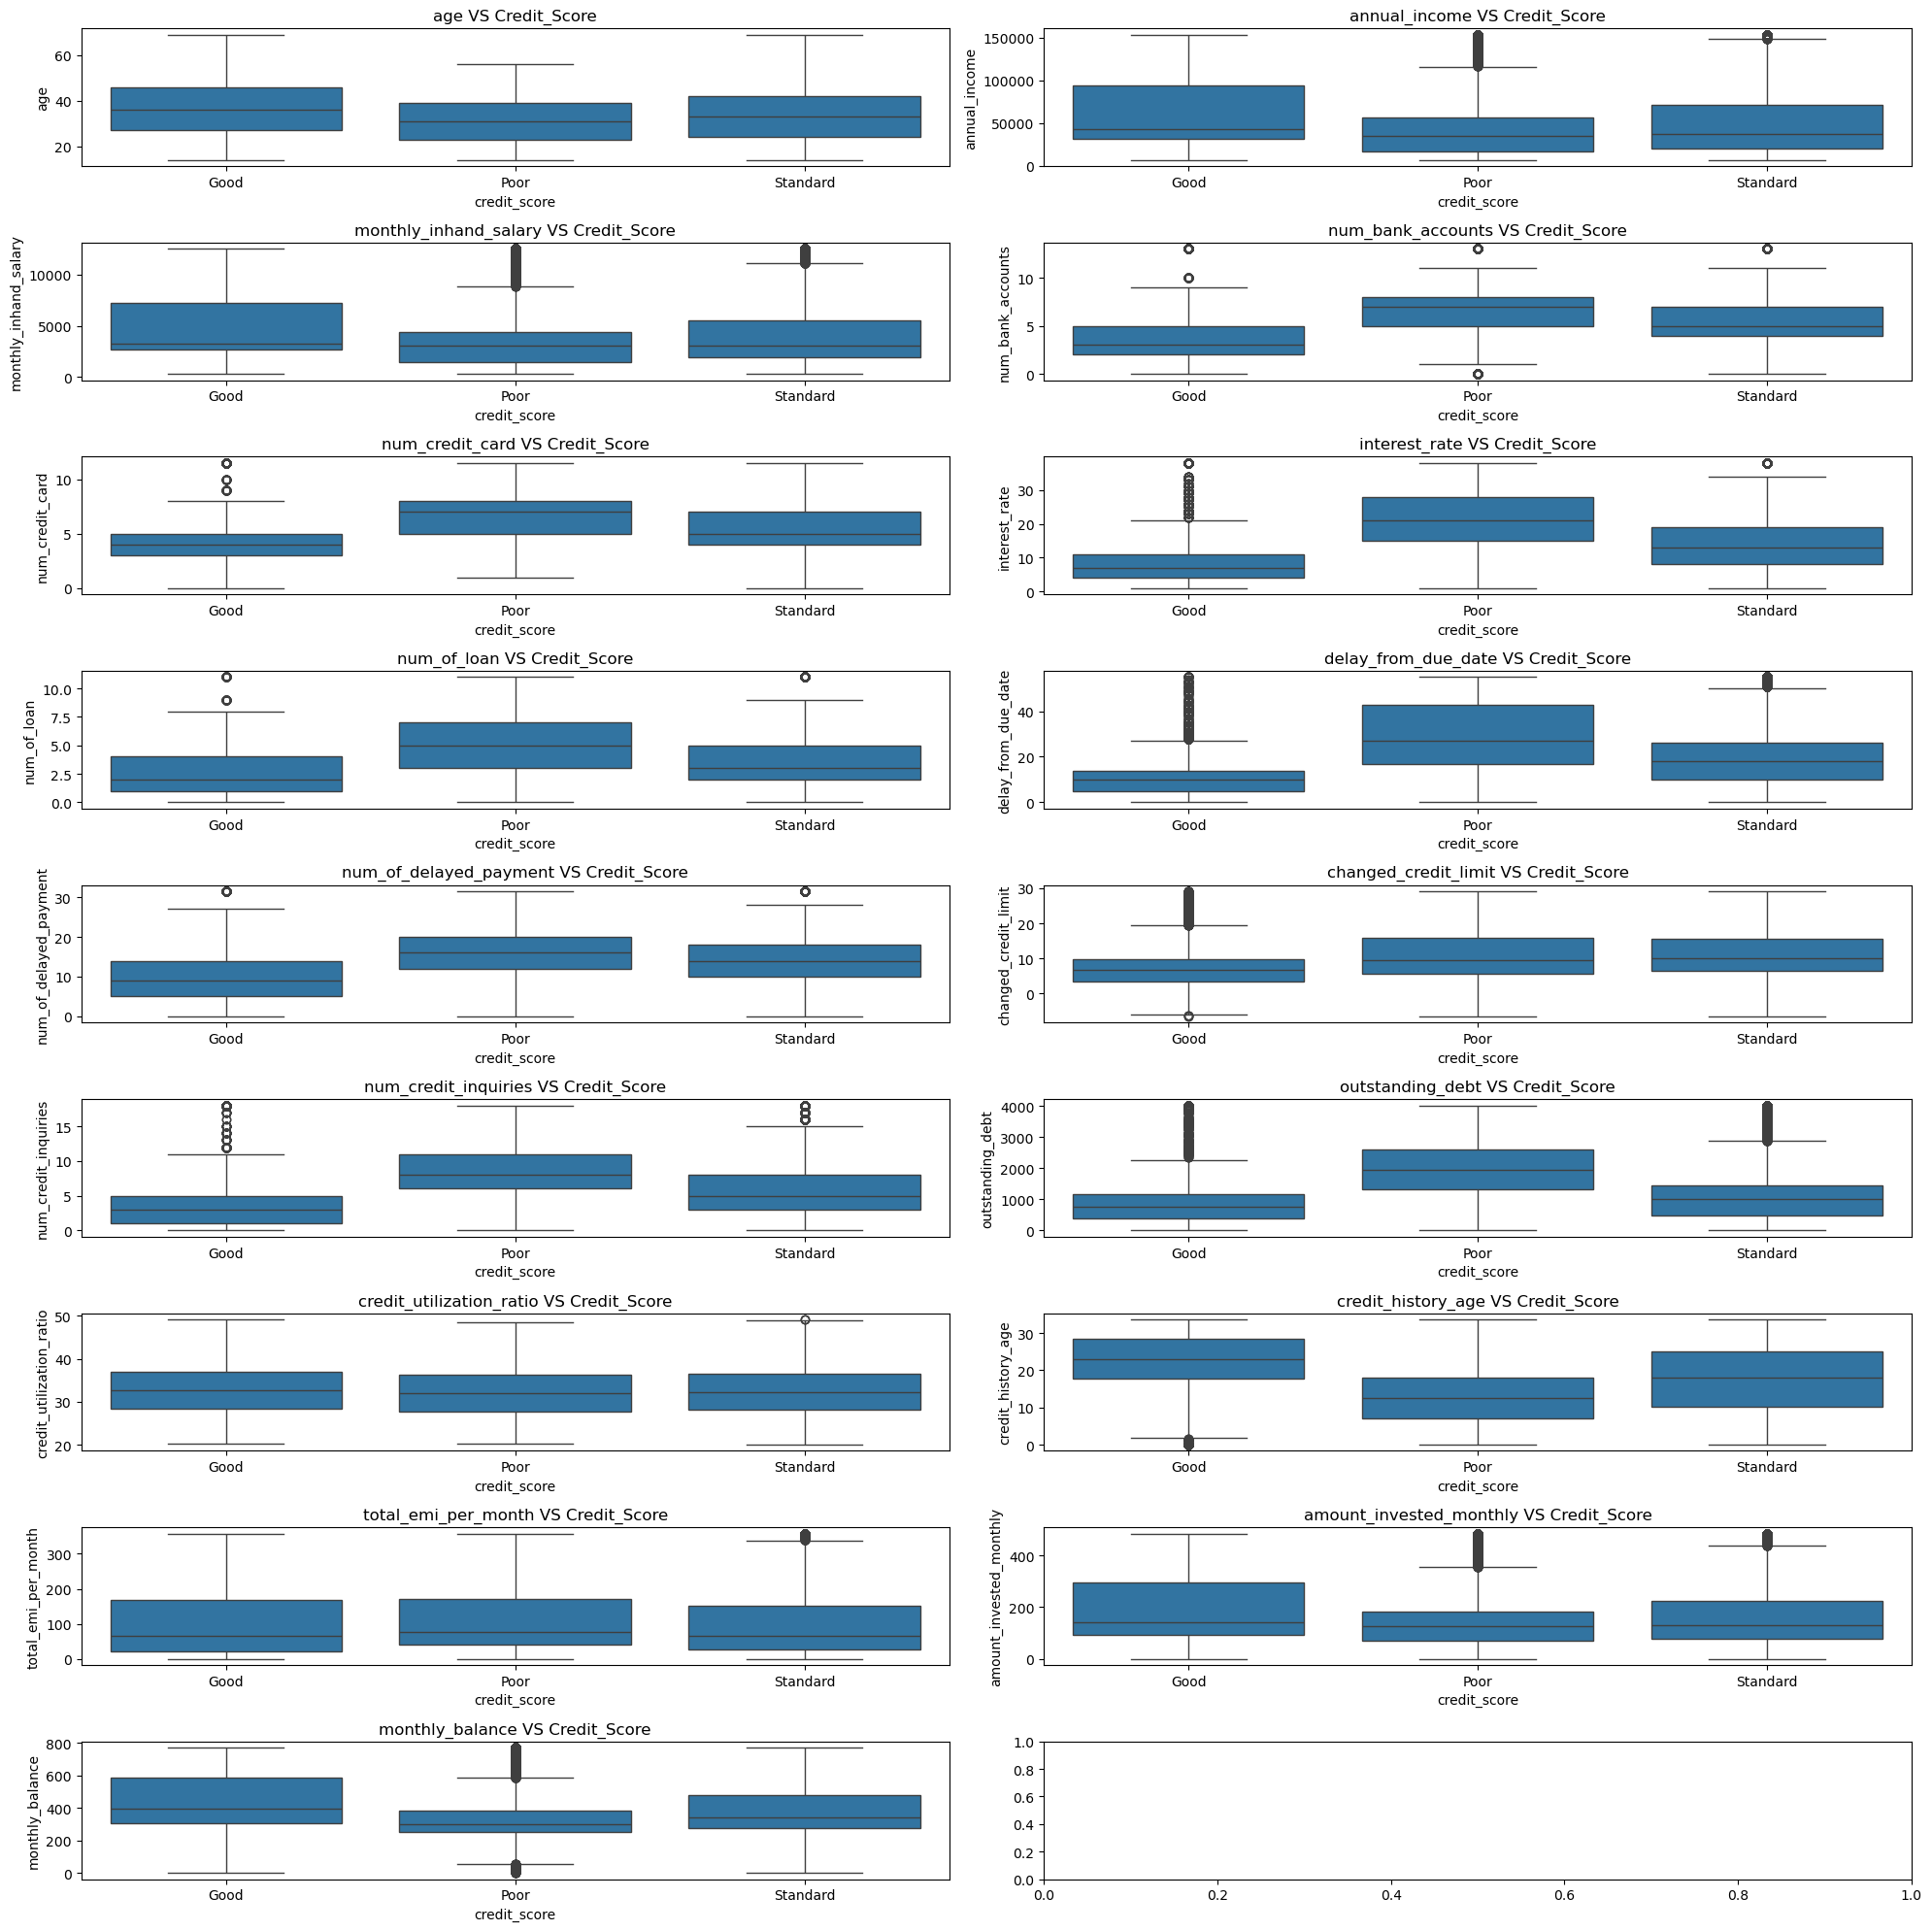

In [48]:
fig, axes = plt.subplots(9, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x = relevant_copy['credit_score'],y=relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'{col} VS Credit_Score') 

plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()

In [81]:
min_credit_age = 18
# Identify rows with inconsistencies
inconsistent_rows = relevant_copy[(relevant_copy['credit_history_age'] > relevant_copy['age']) | (relevant_copy['age'] < min_credit_age)]

In [89]:
# inconsistent_rows[['age','credit_history_age']] 
relevant_copy.loc[inconsistent_rows.index, 'credit_history_age'] = min_credit_age
relevant_copy['credit_history_diff'] = relevant_copy['age'] - relevant_copy['credit_history_age']


In [92]:
relevant_copy[relevant_copy['credit_history_diff'] < 18]

month   age occupation  annual_income  monthly_inhand_salary  \
0      January  23.0  Scientist       19114.12            1824.843333   
3        April  23.0  Scientist       19114.12            3097.624167   
4          May  23.0  Scientist       19114.12            1824.843333   
5         June  23.0  Scientist       19114.12            3097.624167   
6         July  23.0  Scientist       19114.12            1824.843333   
...        ...   ...        ...            ...                    ...   
99995    April  25.0   Mechanic       39628.99            3359.415833   
99996      May  25.0   Mechanic       39628.99            3359.415833   
99997     June  25.0   Mechanic       39628.99            3359.415833   
99998     July  25.0   Mechanic       39628.99            3359.415833   
99999   August  25.0   Mechanic       37605.04            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
5                    3.0              4.0            3.0          4.0   
6                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0           38.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                      3.0                     7.0                 11.27   
3                      5.0                     4.0                  6.27   
4                      6.0                    14.0                 11.27   
5                      8.0                     4.0                  9.27   
6                      3.0                    14.0                 11.27   
...                    ...                     ...                   ...   
99995                 23.0                     7.0                 11.50   
99996                 18.0                     7.0                 11.50   
99997                 27.0                     6.0                 11.50   
99998                 20.0                    14.0                 11.50   
99999                 18.0                     6.0                 11.50   

       num_credit_inquiries credit_mix  outstanding_debt  \
0                       4.0   Standard            809.98   
3                       4.0       Good            809.98   
4                       4.0       Good            809.98   
5                       4.0       Good            809.98   
6                       4.0       Good            809.98   
...                     ...        ...               ...   
99995                   3.0   Standard            502.38   
99996                   3.0   Standard            502.38   
99997                   3.0       Good            502.38   
99998                   3.0       Good            502.38   
99999                   3.0       Good            502.38   

       credit_utilization_ratio  credit_history_age payment_of_min_amount  \
0                     26.822620           22.083333                    No   
3                     31.377862           22.333333                    No   
4                     24.797347           22.416667                    No   
5                     27.262259           22.500000                    No   
6                     22.537593           22.583333                    No   
...                         ...                 ...                   ...   
99995                 34.663572           18.000000                    No   
99996

In [88]:
relevant_copy = relevant_copy.query("credit_history_diff == True")

month   age occupation  annual_income  monthly_inhand_salary  \
290       March  16.0   Mechanic       29469.98            2227.831667   
291       April  16.0   Mechanic       29469.98            2227.831667   
292         May  16.0   Mechanic       29469.98            2227.831667   
293        June  16.0   Mechanic       37605.04            3097.624167   
294        July  16.0   Mechanic       29469.98            3097.624167   
...         ...   ...        ...            ...                    ...   
99807    August  17.0  Developer       14937.49            1142.790833   
99960   January  18.0     Lawyer       42903.79            3468.315833   
99961  February  18.0     Lawyer       42903.79            3468.315833   
99962     March  18.0     Lawyer       42903.79            3468.315833   
99964       May  18.0     Lawyer       42903.79            3468.315833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
290                  7.0              7.0           24.0          5.0   
291                  7.0              7.0           24.0          5.0   
292                  7.0              7.0           24.0          5.0   
293                  7.0              7.0           24.0          5.0   
294                  7.0              7.0           24.0          5.0   
...                  ...              ...            ...          ...   
99807                8.0              8.0           22.0          7.0   
99960                0.0              4.0            6.0          1.0   
99961                0.0              4.0            6.0          1.0   
99962                0.0              4.0            6.0          1.0   
99964                0.0              4.0            6.0          1.0   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
290                   53.0                    24.0                 27.94   
291                   53.0                    21.0                 26.94   
292                   53.0                    21.0                 26.94   
293                   53.0                    21.0                 27.94   
294                   55.0                    24.0                 26.94   
...                    ...                     ...                   ...   
99807                 43.0                    15.0                 24.17   
99960                 14.0                     0.0                  4.10   
99961                 14.0                     0.0                 -0.90   
99962                 14.0                     0.0                 12.10   
99964                 14.0                     0.0                  5.10   

       num_credit_inquiries credit_mix  outstanding_debt  \
290                    11.0   Standard           3421.66   
291                    11.0        Bad           3421.66   
292                    11.0        Bad           3421.66   
293                    11.0        Bad           3421.66   
294                    11.0        Bad           3421.66   
...                     ...        ...               ...   
99807                   9.0        Bad           3699.44   
99960                   1.0       Good           1079.48   
99961                   1.0       Good           1079.48   
99962                   1.0   Standard           1079.48   
99964                   1.0       Good           1079.48   

       credit_utilization_ratio  credit_history_age payment_of_min_amount  \
290                   31.212269                18.0                   Yes   
291                   33.298654                18.0                   Yes   
292                   38.177311                18.0                   Yes   
293                   30.986998                18.0                   Yes   
294                   33.283061                18.0                   Yes   
...                         ...                 ...                   ...   
99807                 23.120963                18.0                   Y

In [80]:
relevant_copy['credit_history_diff'] = relevant_copy['age'] - relevant_copy['credit_history_age']
relevant_copy['diff_bool'] = relevant_copy['credit_history_diff'] > 15
false_ = relevant_copy.query("diff_bool==False")
false_[['age','credit_history_age','credit_history_diff']]

age  credit_history_age  credit_history_diff
0      23.0           22.083333             0.916667
3      23.0           22.333333             0.666667
4      23.0           22.416667             0.583333
5      23.0           22.500000             0.500000
6      23.0           22.583333             0.416667
...     ...                 ...                  ...
99995  25.0           31.500000            -6.500000
99996  25.0           31.583333            -6.583333
99997  25.0           31.666667            -6.666667
99998  25.0           31.750000            -6.750000
99999  25.0           31.833333            -6.833333

[42240 rows x 3 columns]

In [ ]:
relevant_copy['credit_history_diff'] = relevant_copy['age'] - relevant_copy['credit_history_age']

# sliced = relevant_copy.query("credit_history_diff<16")
relevant_copy['new_age'] = relevant_copy['credit_history_diff'].apply(lambda x:x+10 if x < 16)
# sliced['new_diff'] = sliced['new_age'] - sliced['credit_history_age']
# # sliced
# # sliced[['age','new_age', 'credit_history_age', 'credit_history_diff', 'new_diff']]
# sliced.query("new_diff<16")


SyntaxError: expected 'else' after 'if' expression (253975438.py, line 4)

In [49]:
# relevant_copy['credit_history_diff'] = relevant_copy['age'] - relevant_copy['credit_history_age']
# sliced = relevant_copy.query("credit_history_diff<16")
# sliced['new_age'] = sliced['age'] + 10
# sliced['new_diff'] = sliced['new_age'] - sliced['credit_history_age']
# # sliced
# # sliced[['age','new_age', 'credit_history_age', 'credit_history_diff', 'new_diff']]
# sliced.query("new_diff<16")


month   age occupation  annual_income  monthly_inhand_salary  \
0      January  23.0  Scientist       19114.12            1824.843333   
3        April  23.0  Scientist       19114.12            3097.624167   
4          May  23.0  Scientist       19114.12            1824.843333   
5         June  23.0  Scientist       19114.12            3097.624167   
6         July  23.0  Scientist       19114.12            1824.843333   
...        ...   ...        ...            ...                    ...   
99995    April  25.0   Mechanic       39628.99            3359.415833   
99996      May  25.0   Mechanic       39628.99            3359.415833   
99997     June  25.0   Mechanic       39628.99            3359.415833   
99998     July  25.0   Mechanic       39628.99            3359.415833   
99999   August  25.0   Mechanic       37605.04            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
5                    3.0              4.0            3.0          4.0   
6                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0           38.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                      3.0                     7.0                 11.27   
3                      5.0                     4.0                  6.27   
4                      6.0                    14.0                 11.27   
5                      8.0                     4.0                  9.27   
6                      3.0                    14.0                 11.27   
...                    ...                     ...                   ...   
99995                 23.0                     7.0                 11.50   
99996                 18.0                     7.0                 11.50   
99997                 27.0                     6.0                 11.50   
99998                 20.0                    14.0                 11.50   
99999                 18.0                     6.0                 11.50   

       num_credit_inquiries credit_mix  outstanding_debt  \
0                       4.0   Standard            809.98   
3                       4.0       Good            809.98   
4                       4.0       Good            809.98   
5                       4.0       Good            809.98   
6                       4.0       Good            809.98   
...                     ...        ...               ...   
99995                   3.0   Standard            502.38   
99996                   3.0   Standard            502.38   
99997                   3.0       Good            502.38   
99998                   3.0       Good            502.38   
99999                   3.0       Good            502.38   

       credit_utilization_ratio  credit_history_age payment_of_min_amount  \
0                     26.822620           22.083333                    No   
3                     31.377862           22.333333                    No   
4                     24.797347           22.416667                    No   
5                     27.262259           22.500000                    No   
6                     22.537593           22.583333                    No   
...                         ...                 ...                   ...   
99995                 34.663572           31.500000                    No   
99996

In [50]:
# above_18 = relevant_copy[relevant_copy['age']>=18]

# relevant_copy['history_in_yrs'] = relevant_copy['credit_history_age'].str.split(' ').str[0].astype('int')
# relevant_copy['diff_btwn_age_and_hist'] = relevant_copy['age'] - relevant_copy['history_in_yrs'].astype('int')
# relevant_copy['months'] = relevant_copy['credit_history_age'].apply(lambda x: int(x.split(' ')[-2]))
# relevant_copy['credit_history_age'] = (relevant_copy['history_in_yrs'] * 12) + relevant_copy['months']

 
for index,val in enumerate(relevant_copy.diff_btwn_age_and_hist):
    if val < 18:
        relevant_copy['age'].iloc[index] = relevant_copy['age'].iloc[index] + 18

relevant_copy['new_diff'] = relevant_copy['age'] - relevant_copy['history_in_yrs'].astype('int')
age_cleaned = relevant_copy[relevant_copy['new_diff']>18]
# above_18['history_in_yrs'] = above_18['credit_history_age'].str.split(' ').str[0].astype('int')
# above_18['diff_btwn_age_and_hist'] = above_18['age'] - above_18['history_in_yrs'].astype('int')
# above_18['months'] = above_18['credit_history_age'].apply(lambda x: int(x.split(' ')[-2]))
# above_18['credit_history_age'] = (above_18['history_in_yrs'] * 12) + above_18['months']

 
# for index,val in enumerate(above_18.diff_btwn_age_and_hist):
#     if val < 18:
#         above_18['age'].iloc[index] = above_18['age'].iloc[index] + 18

# above_18['new_diff'] = above_18['age'] - above_18['history_in_yrs'].astype('int')
# age_cleaned = above_18[above_18['new_diff']>18]

AttributeError: 'DataFrame' object has no attribute 'diff_btwn_age_and_hist'

In [ ]:
relevant_copy[['diff_btwn_age_and_hist']].min()

In [ ]:
age_cleaned.shape

In [ ]:
above_18['credit_history_age']
# .apply(lambda x: int(x.split(' ')[-2]))

In [ ]:
cols_to_drop = ['history_in_yrs','diff_btwn_age_and_hist','new_diff', 'months']
age_cleaned.drop(cols_to_drop, axis = 1, inplace =True)

In [ ]:
relevant_copy
# .type_of_loan.str.split(', ')

month   age occupation  annual_income  monthly_inhand_salary  \
0       January  23.0  Scientist       19114.12            1824.843333   
1      February  23.0  Scientist       19114.12            3097.624167   
3         April  23.0  Scientist       19114.12            3097.624167   
4           May  23.0  Scientist       19114.12            1824.843333   
5          June  23.0  Scientist       19114.12            3097.624167   
...         ...   ...        ...            ...                    ...   
99995     April  25.0   Mechanic       39628.99            3359.415833   
99996       May  25.0   Mechanic       39628.99            3359.415833   
99997      June  25.0   Mechanic       39628.99            3359.415833   
99998      July  25.0   Mechanic       39628.99            3359.415833   
99999    August  25.0   Mechanic       37605.04            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
5                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0           38.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

                                            type_of_loan  delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                  1.0   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                  5.0   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                  6.0   
5      Auto Loan, Credit-Builder Loan, Personal Loan,...                  8.0   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                 23.0   
99996                        Auto Loan, and Student Loan                 18.0   
99997                        Auto Loan, and Student Loan                 27.0   
99998                        Auto Loan, and Student Loan                 20.0   
99999                        Auto Loan, and Student Loan                 18.0   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
0                         7.0                 11.27                   4.0   
1                        14.0                 11.27                   4.0   
3                         4.0                  6.27                   4.0   
4                        14.0                 11.27                   4.0   
5                         4.0                  9.27                   4.0   
...                       ...                   ...                   ...   
99995                     7.0                 11.50                   3.0   
99996                     7.0                 11.50                   3.0   
99997                     6.0                 11.50                   3.0   
99998                    14.0                 11.50                   3.0   
99999                     6.0                 11.50                   3.0   

      credit_mix  outstanding_debt  credit_utilization_ratio  \
0       Standard            809.98                 26.822620   
1           Good            809.98                 31.944960   
3           Good            809.98                 31.377862   
4           Good            809.98                 24.797347   
5           Good          

In [ ]:
# type_of_loans_splited = age_cleaned.type_of_loan.str.split(', ')
type_of_loans_splited = relevant_copy.type_of_loan.str.split(', ')

_1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others = categorize_loan_types(type_of_loans_splited)



print(f'1 loan: {_1_types}')
print('____________'*10)
print(f'2 loans: {_2_types}')
print('____________'*10)
print(f'3 loans: {_3_types}')
print('____________'*10)
print(f'4 loans: {_4_types}')
print('____________'*10)
print(f'5 loans: {_5_types}')
print('____________'*10)
print(f'6 loans: {_6_types}')
print('____________'*10)
print(f'7 loans: {_7_types}')
print('____________'*10)
print(f'8 loans: {_8_types}')
print('____________'*10)
print(f'9 loans: {_9_types}')
print('____________'*10)
print(f'Others: {_others}')
# print('____________'*10)
# iloc[1]



loans_list = [_1_types,_2_types,_3_types,_4_types,_5_types,_6_types,_7_types,_8_types,_9_types]
[i[0] for i in loans_list]

1 loan: [['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'], ['not specified'],

[['Credit-Builder Loan'],
 ['Credit-Builder Loan', 'and Mortgage Loan'],
 ['Auto Loan', 'Auto Loan', 'and Not Specified'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'and Home Equity Loan'],
 ['Not Specified',
  'Student Loan',
  'Student Loan',
  'Credit-Builder Loan',
  'and Auto Loan'],
 ['Credit-Builder Loan',
  'Not Specified',
  'Mortgage Loan',
  'Payday Loan',
  'Credit-Builder Loan',
  'and Personal Loan'],
 ['Personal Loan',
  'Payday Loan',
  'Student Loan',
  'Auto Loan',
  'Home Equity Loan',
  'Student Loan',
  'and Payday Loan'],
 ['Payday Loan',
  'Not Specified',
  'Credit-Builder Loan',
  'Debt Consolidation Loan',
  'Payday Loan',
  'Not Specified',
  'Student Loan',
  'and Student Loan'],
 ['Credit-Builder Loan',
  'Personal Loan',
  'Credit-Builder Loan',
  'Mortgage Loan',
  'Personal Loan',
  'Payday Loan',
  'Payday Loan',
  'Payday Loan',
  'and Student Loan']]

In [ ]:
relevant_copy.type_of_loan_splitted.unique()

array(['auto loan, credit-builder loan, personal loan, and home equity loan',
       'credit-builder loan', 'auto loan, auto loan, and not specified',
       ..., 'home equity loan, auto loan, auto loan, and auto loan',
       'payday loan, student loan, mortgage loan, and not specified',
       'personal loan, auto loan, mortgage loan, student loan, and student loan'],
      dtype=object)

In [ ]:


# Identify unique values
unique_loan_types = age_cleaned['type_of_loan'].str.split(', ').explode().unique()
# Remove 'and'
unique_loan_types_ = [x.split('and ')[1] if x.startswith('and') else x for x in unique_loan_types] 


# Create binary columns
for loan_type in unique_loan_types_:
    age_cleaned[loan_type] = age_cleaned['type_of_loan'].apply(lambda x: 1 if loan_type in x else 0)

# Drop the original column 
age_cleaned = age_cleaned.drop('type_of_loan', axis=1)

age_cleaned


The dataset has been cleaned and some features have be engineered.